In [266]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
from collections import Counter
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression

In [267]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [268]:
variable_inderstand = pd.read_csv('VariableDefinitions.csv')

In [269]:
variable_inderstand

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [270]:
id = test_df.ID

In [271]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [272]:
test_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [273]:
train_df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [274]:
test_df.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


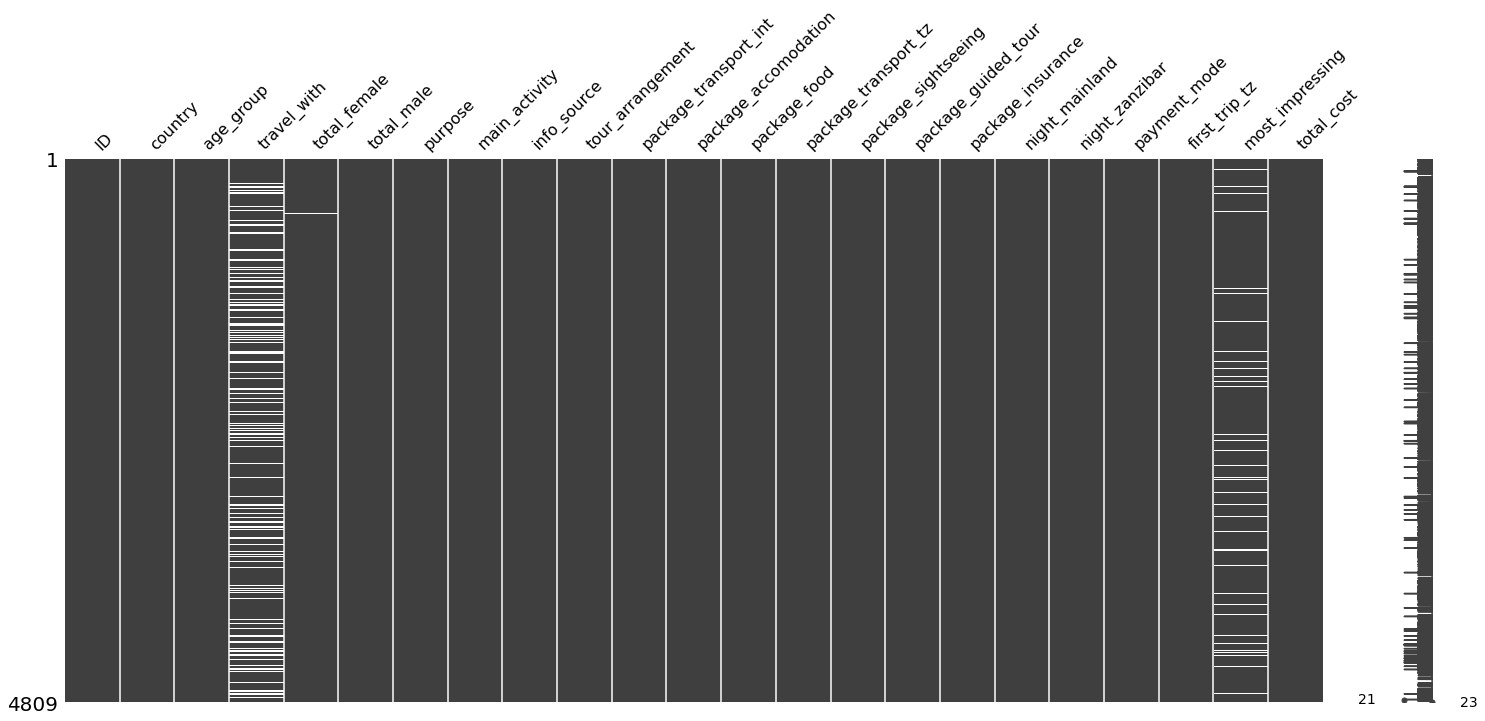

In [275]:
mis.matrix(train_df)

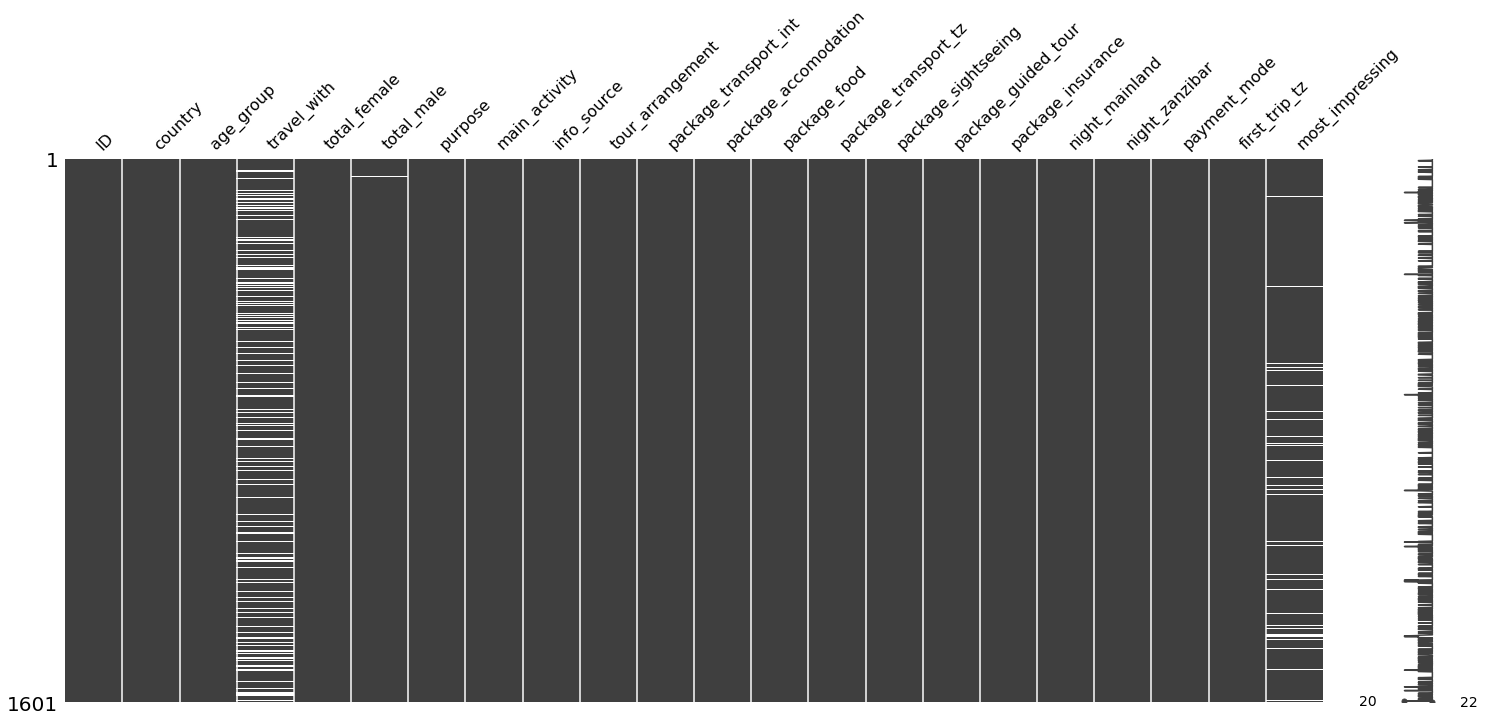

In [276]:
mis.matrix(test_df)

In [277]:
train_df['travel_with'].unique()

array(['Friends/Relatives', nan, 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

In [278]:
train_df['most_impressing'].unique()

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', nan,
       'Good service', 'Satisfies and Hope Come Back'], dtype=object)

In [279]:
test_df['travel_with'].unique()

array(['Spouse', 'Friends/Relatives', nan, 'Alone', 'Spouse and Children',
       'Children'], dtype=object)

In [280]:
test_df['most_impressing'].unique()

array([' Wildlife', 'Wonderful Country, Landscape, Nature', 'No comments',
       'Friendly People', 'Good service', nan,
       'Satisfies and Hope Come Back', 'Excellent Experience'],
      dtype=object)

In [281]:
print('train data :',train_df.shape ,'-'*20,'test data :',test_df.shape)

train data : (4809, 23) -------------------- test data : (1601, 22)


In [282]:
train_df['total_cost'].sort_values(ascending = False)

3411    99532875.0
2826    99450000.0
1731    95992659.0
388     94809000.0
1805    92645962.5
           ...    
4374       49725.0
3704       49725.0
3505       49725.0
4496       49000.0
4413       49000.0
Name: total_cost, Length: 4809, dtype: float64

In [283]:
train_df['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [284]:
train_df.dtypes.value_counts()

object     18
float64     5
dtype: int64

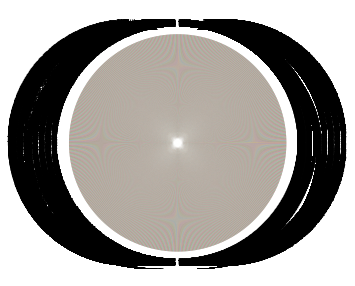

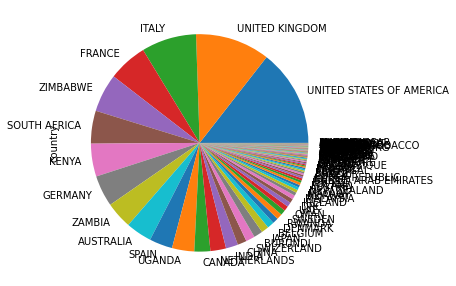

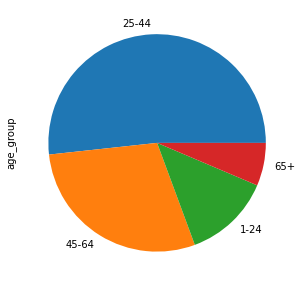

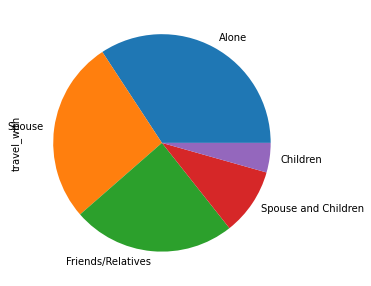

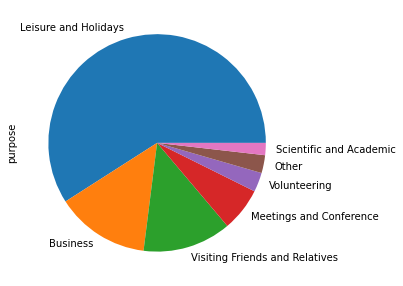

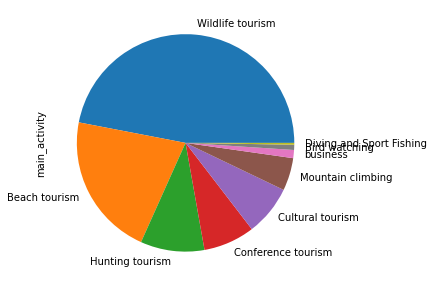

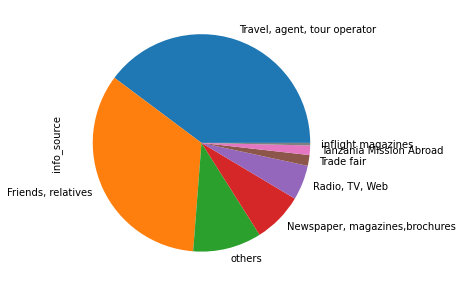

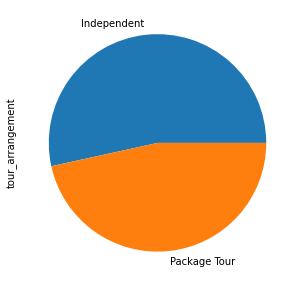

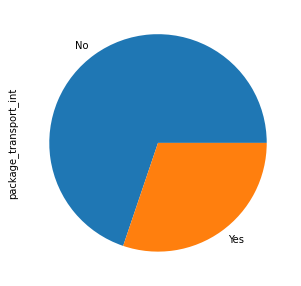

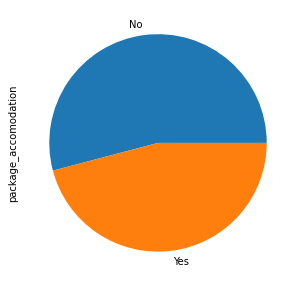

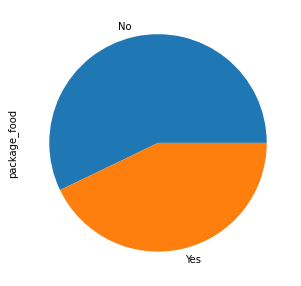

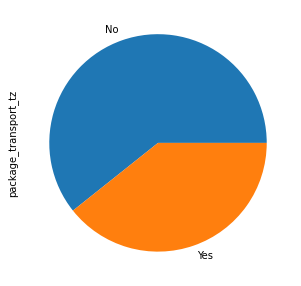

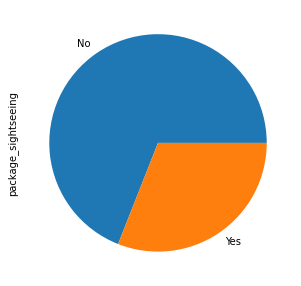

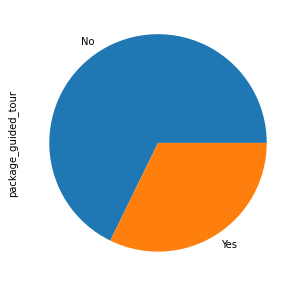

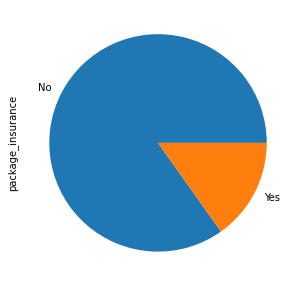

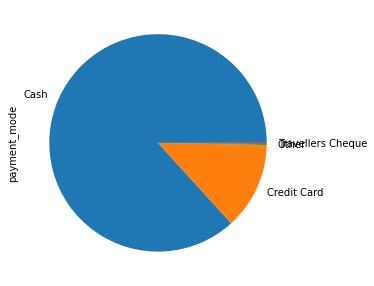

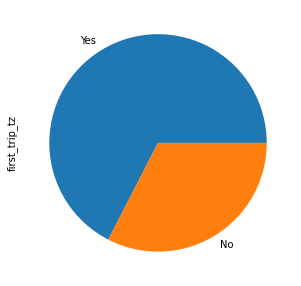

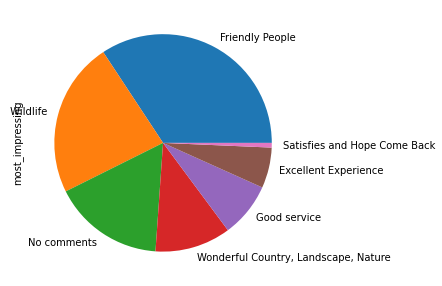

In [285]:
for col in train_df.select_dtypes('object'):
  plt.figure(figsize=(10,5))
  train_df[col].value_counts().plot.pie()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

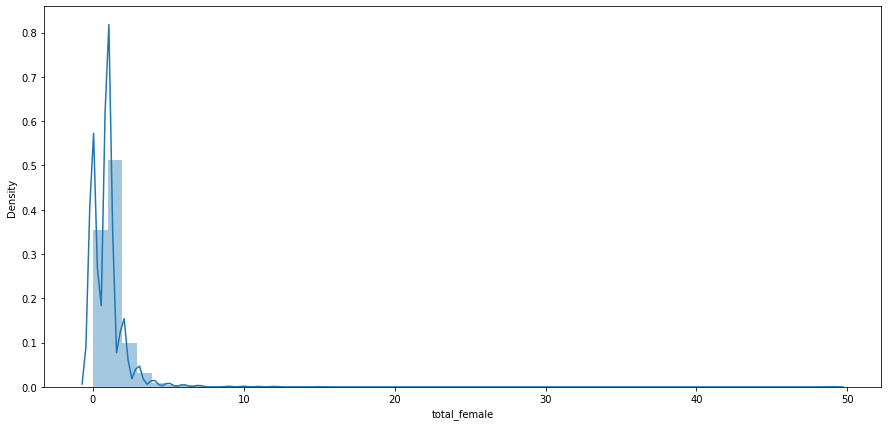

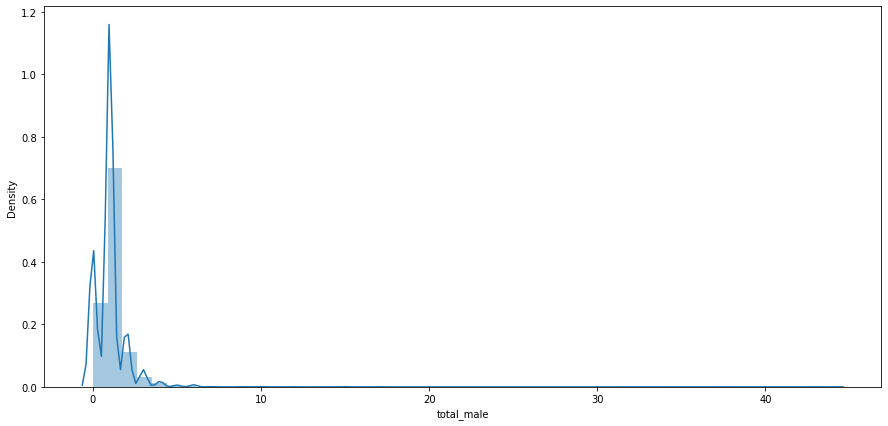

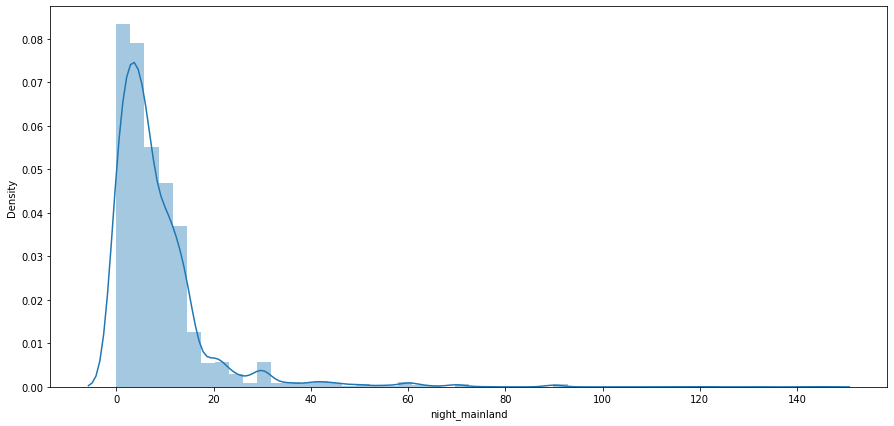

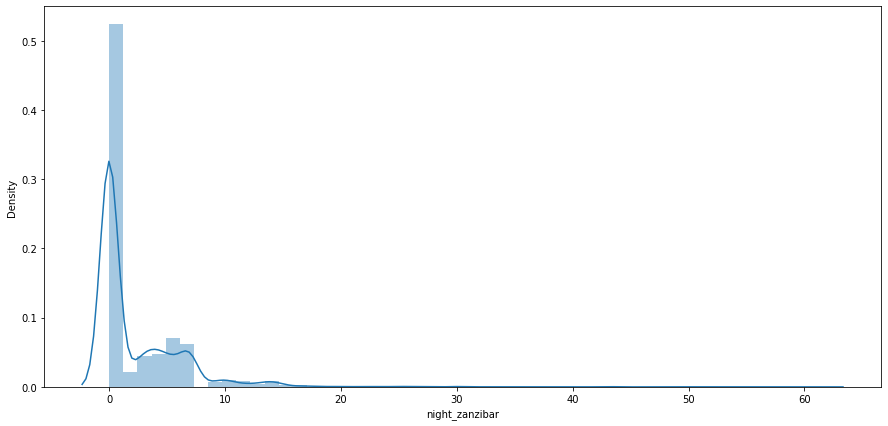

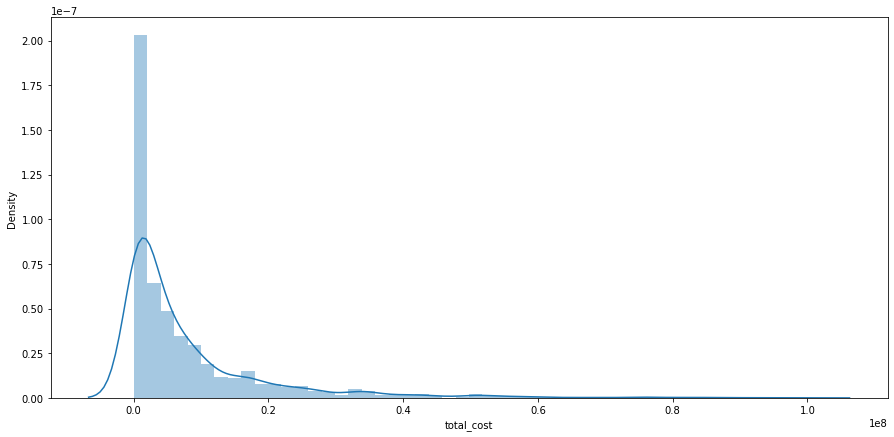

In [286]:
for col in train_df.select_dtypes('float64'):
  plt.figure(figsize=(15 , 7))
  sns.distplot(train_df[col])

In [287]:
train_df=train_df.sort_values(by = ['package_guided_tour' , 'package_food','age_group'])

In [288]:
test_df=test_df.sort_values(by = ['package_guided_tour' , 'package_food','age_group'])

In [289]:
train_df.head(-20)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
20,tour_1027,UNITED KINGDOM,1-24,NaN,1.0,0.0,Volunteering,Cultural tourism,Tanzania Mission Abroad,Independent,No,No,No,No,No,No,No,70.0,0.0,Cash,Yes,"Wonderful Country, Landscape, Nature",711262.5
24,tour_1030,IRELAND,1-24,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,20.0,6.0,Cash,Yes,Friendly People,5673325.0
25,tour_1032,DENMARK,1-24,Friends/Relatives,2.0,2.0,Scientific and Academic,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,15.0,7.0,Cash,Yes,No comments,400000.0
27,tour_1034,GERMANY,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,24.0,4.0,Cash,Yes,Good service,453866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,tour_5412,UNITED STATES OF AMERICA,65+,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,Trade fair,Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,6.0,0.0,Credit Card,Yes,Wildlife,77902500.0
3681,tour_5460,UNITED STATES OF AMERICA,65+,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Wildlife,22044750.0
3682,tour_5462,UNITED STATES OF AMERICA,65+,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,4.0,0.0,Cash,Yes,Wildlife,7649362.5
3706,tour_5494,AUSTRALIA,65+,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,4.0,0.0,Credit Card,Yes,Wildlife,49841025.0


In [290]:
train_df['travel_with'].unique()

array([nan, 'Friends/Relatives', 'Alone', 'Children', 'Spouse',
       'Spouse and Children'], dtype=object)

In [291]:
columns=train_df.drop(columns= ['total_cost']).columns
columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

In [292]:
encoder = OrdinalEncoder()
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for column in columns:
    encode(train_df[column])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [293]:
encoder = OrdinalEncoder()
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for column in columns:
  if(column !='ID'):
    encode(test_df[column])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [294]:
id_test = test_df.ID

In [295]:
train_df

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4,4.0,13.0,0.0,NaN,1.0,0.0,1.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0.0,1.0,4,1657500.0
20,20.0,99.0,0.0,NaN,1.0,0.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,1.0,6,711262.5
24,24.0,39.0,0.0,2,1.0,1.0,1.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,0.0,1.0,2,5673325.0
25,25.0,21.0,0.0,2,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,1.0,4,400000.0
27,27.0,31.0,0.0,NaN,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,4.0,0.0,1.0,3,453866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,4205.0,100.0,3.0,3,1.0,1.0,1.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,0.0,0.0,1.0,6,33813000.0
4643,4643.0,21.0,3.0,2,2.0,2.0,1.0,7.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,13.0,0.0,0.0,0.0,4,18232500.0
4735,4735.0,64.0,3.0,3,1.0,1.0,1.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0,7.0,1.0,1.0,2,10773750.0
4767,4767.0,10.0,3.0,3,1.0,1.0,1.0,7.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0,3.0,0.0,1.0,6,20387250.0


In [296]:
imputer = KNNImputer(n_neighbors = 5)
train_df['travel_with'] = np.round(imputer.fit_transform(train_df[['travel_with']]))

In [297]:
imputer = KNNImputer(n_neighbors = 5)
train_df['most_impressing'] = np.round(imputer.fit_transform(train_df[['most_impressing']]))

In [298]:
imputer = KNNImputer(n_neighbors = 5)
train_df['total_female'] = np.round(imputer.fit_transform(train_df[['total_female']]))

In [299]:
train_df.most_impressing.unique()

array([4., 6., 2., 3., 1., 0., 5.])

In [300]:
test_df.most_impressing.unique()

array([2.0, 4.0, nan, 0.0, 3.0, 1.0, 6.0, 5.0], dtype=object)

In [301]:
imputer = KNNImputer(n_neighbors = 5)
test_df['total_female'] = np.round(imputer.fit_transform(test_df[['total_female']]))
test_df['most_impressing'] = np.round(imputer.fit_transform(test_df[['most_impressing']]))
test_df['travel_with'] = np.round(imputer.fit_transform(test_df[['travel_with']]))

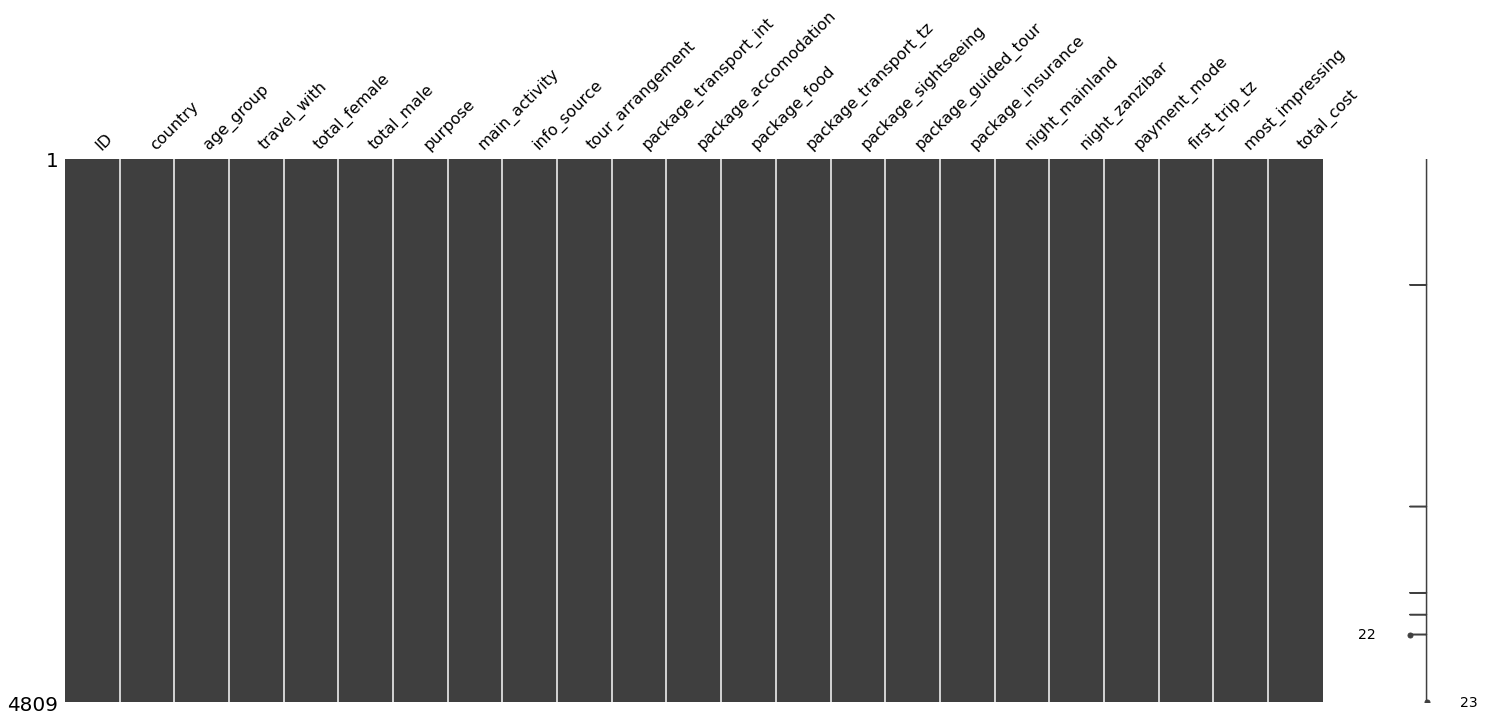

In [302]:
mis.matrix(train_df)

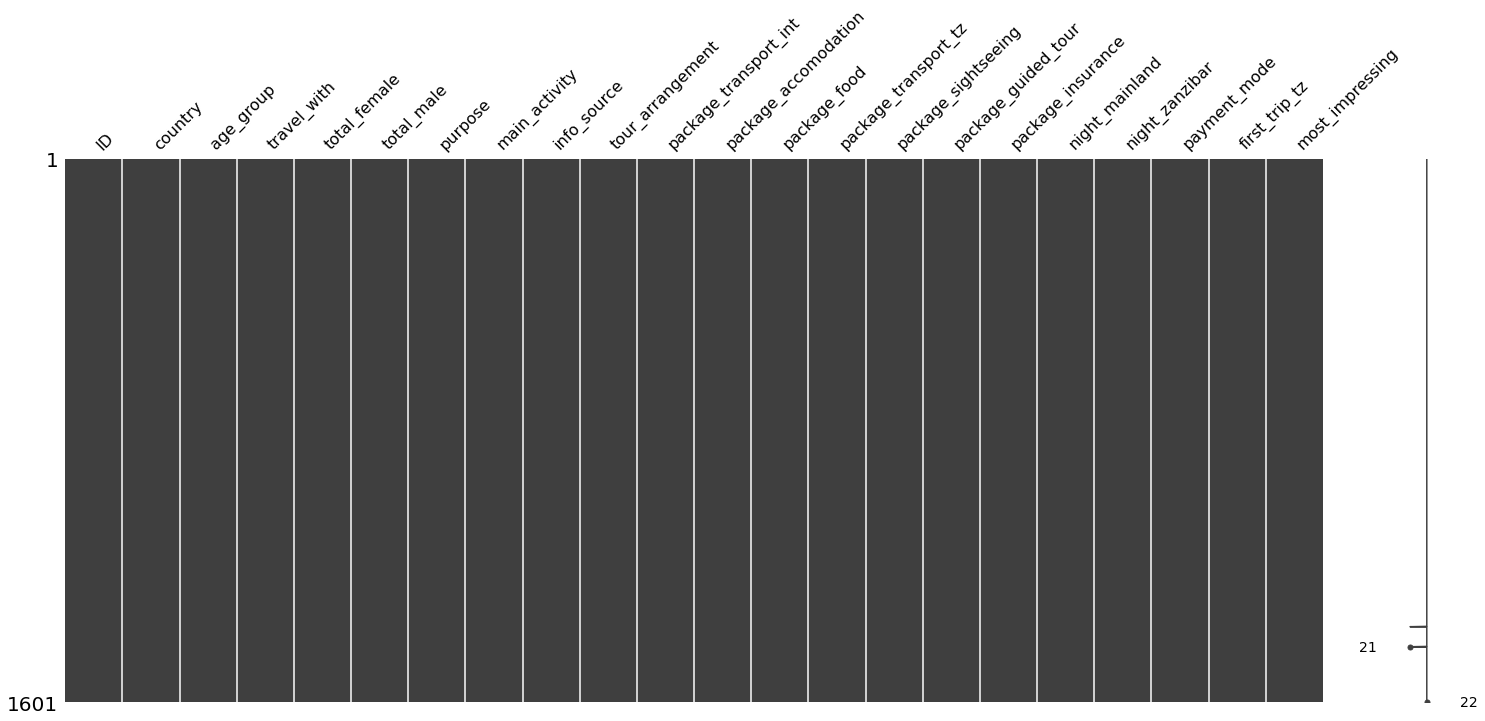

In [303]:
mis.matrix(test_df)

In [304]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4,4.0,13.0,0.0,2.0,1.0,0.0,1.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0.0,1.0,4.0,1657500.0
20,20.0,99.0,0.0,2.0,1.0,0.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,1.0,6.0,711262.5
24,24.0,39.0,0.0,2.0,1.0,1.0,1.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,0.0,1.0,2.0,5673325.0
25,25.0,21.0,0.0,2.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,1.0,4.0,400000.0
27,27.0,31.0,0.0,2.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,4.0,0.0,1.0,3.0,453866.0


In [305]:
lb = LabelEncoder()
for col in train_df.select_dtypes('object'):
  lb.fit(train_df[col])
  train_df[col] = lb.transform(train_df[col])

In [306]:
train_df.dtypes.value_counts()

float64    23
dtype: int64

In [307]:
for col in test_df.select_dtypes('object'):
  lb.fit(test_df[col])
  test_df[col] = lb.transform(test_df[col])

In [308]:
test_df.dtypes.value_counts()

float64    21
int64       1
dtype: int64

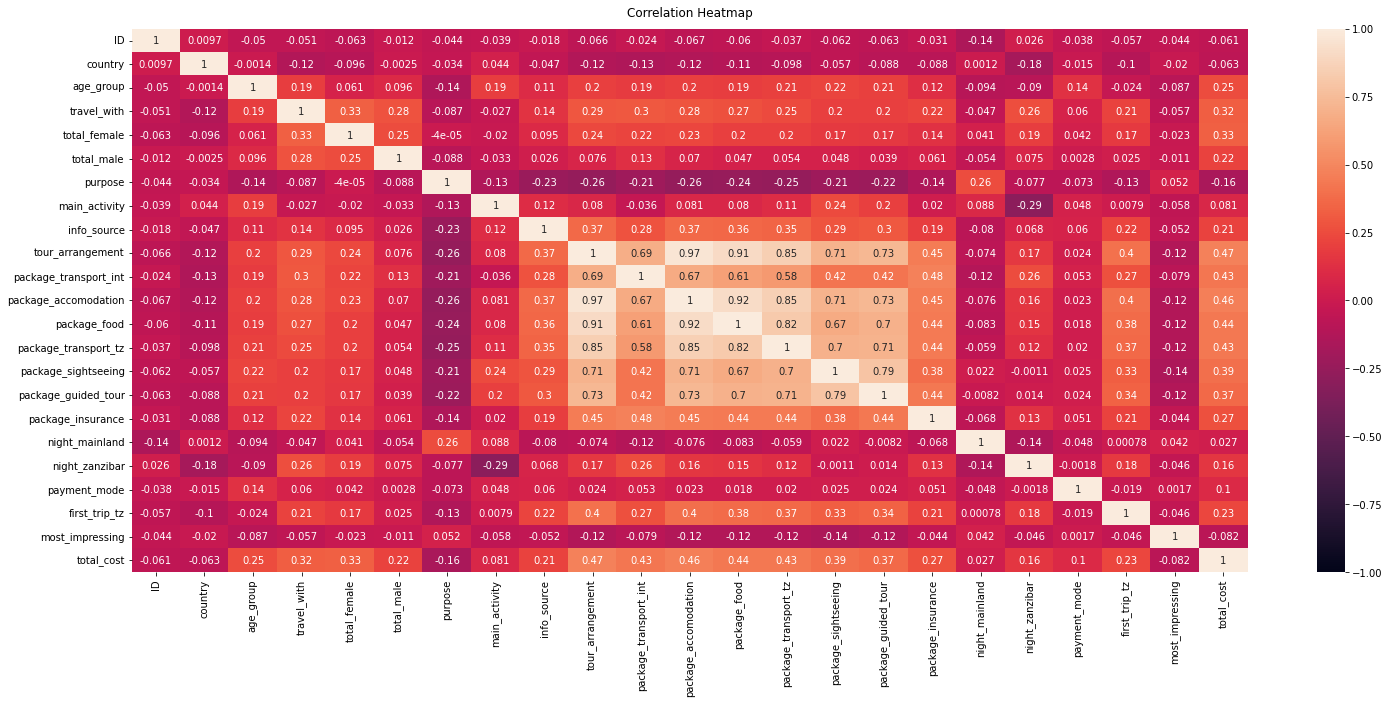

In [309]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


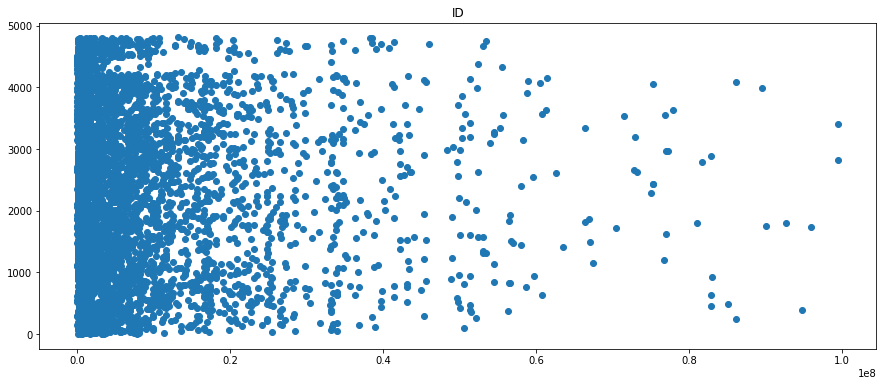

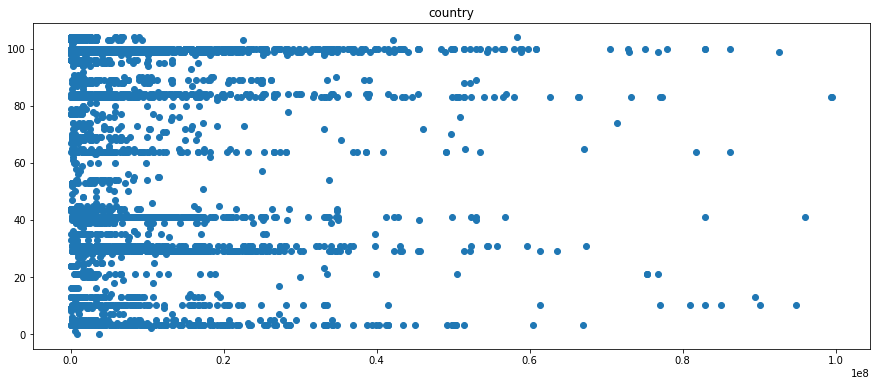

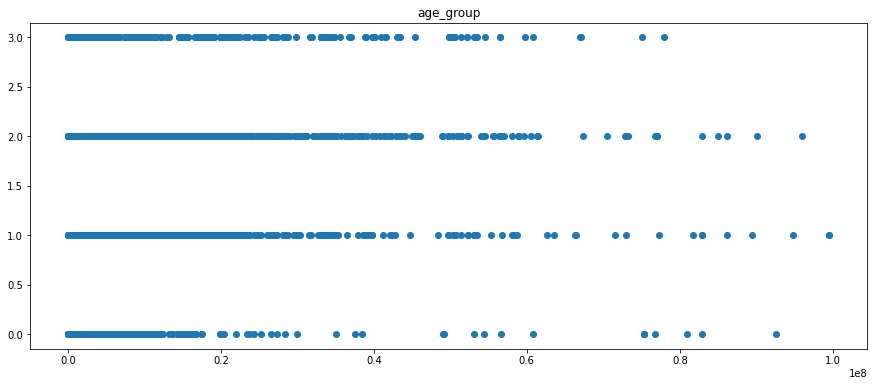

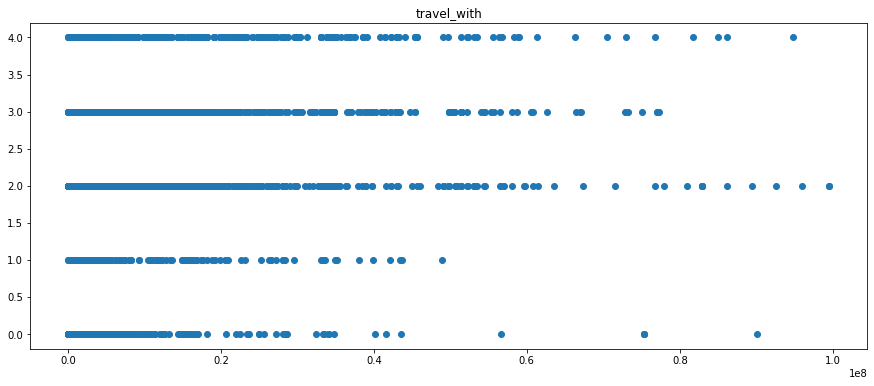

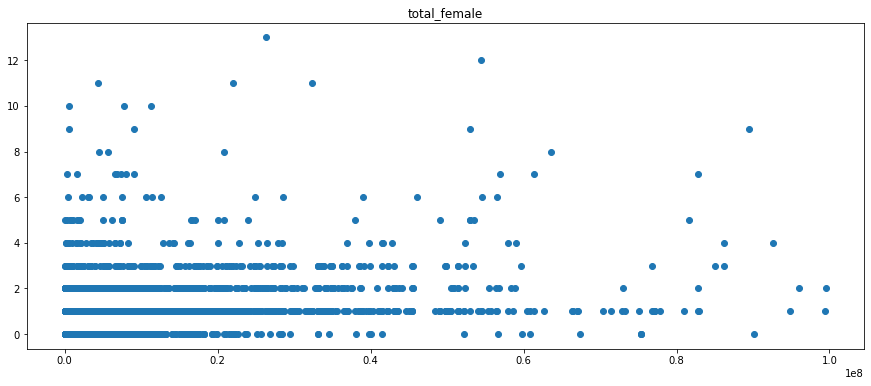

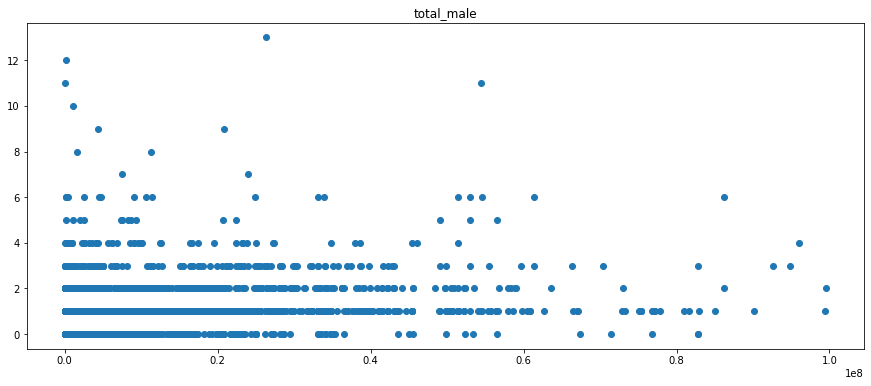

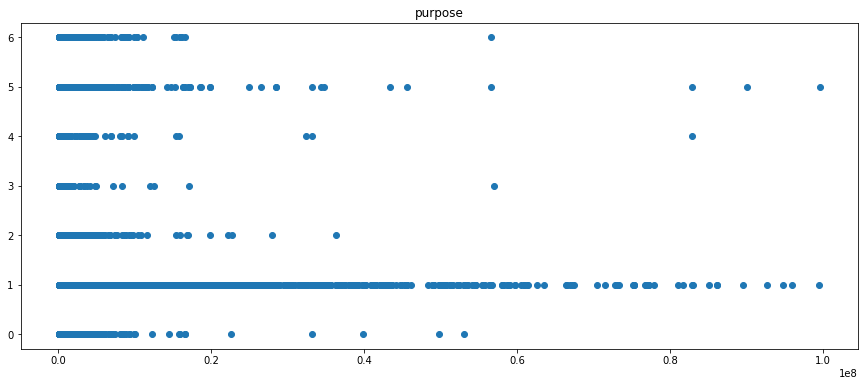

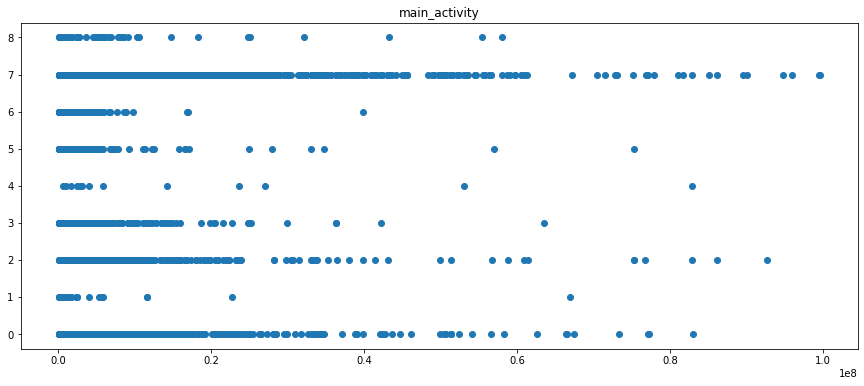

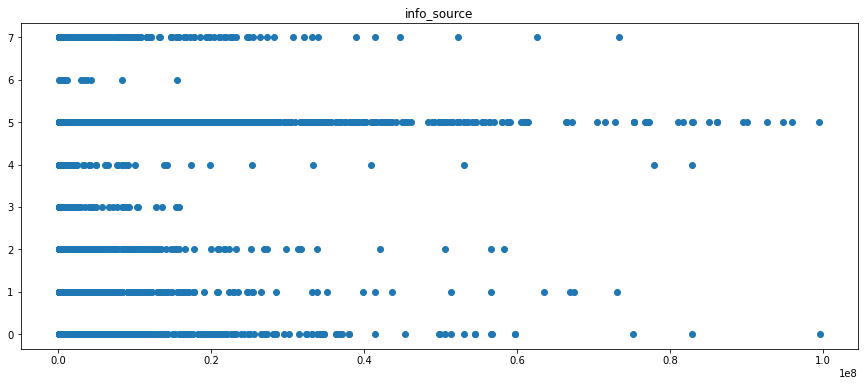

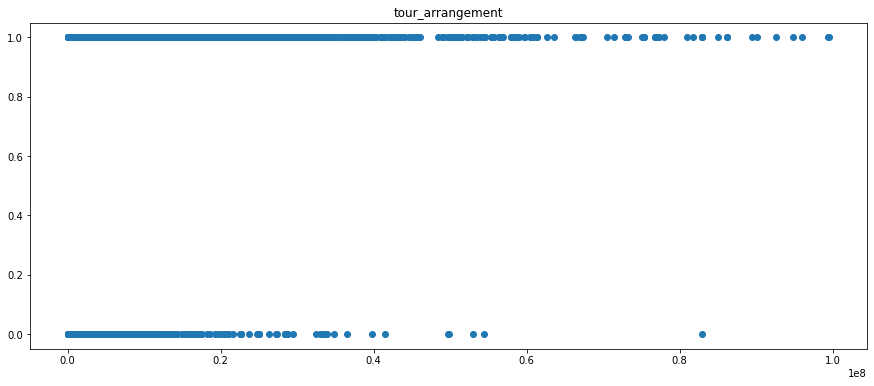

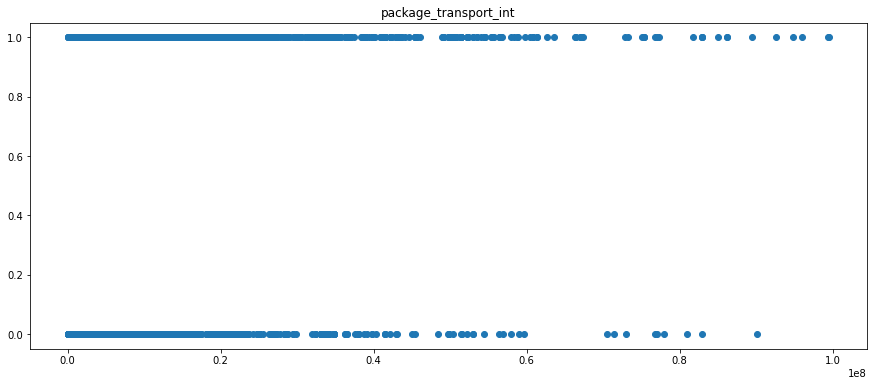

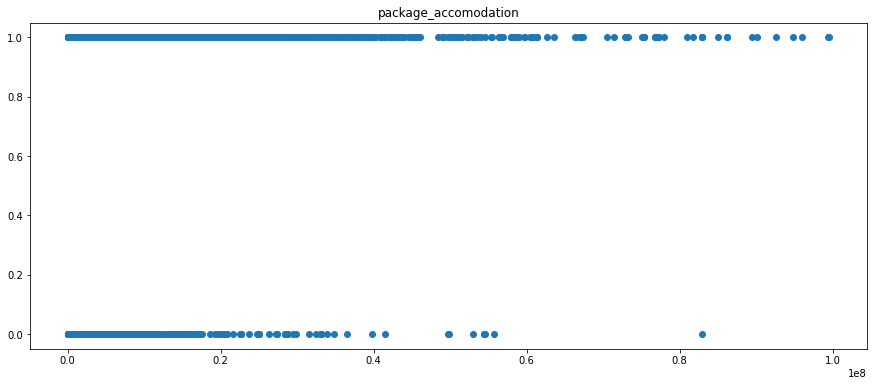

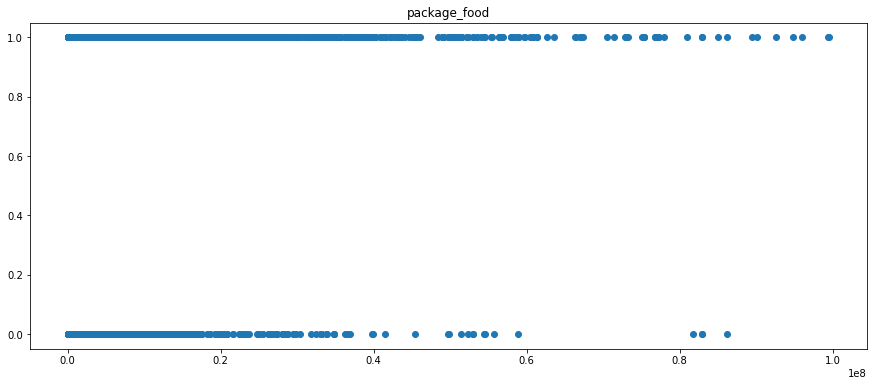

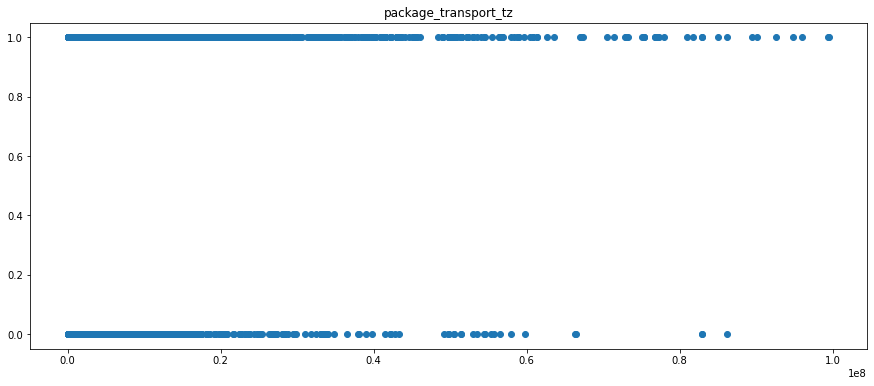

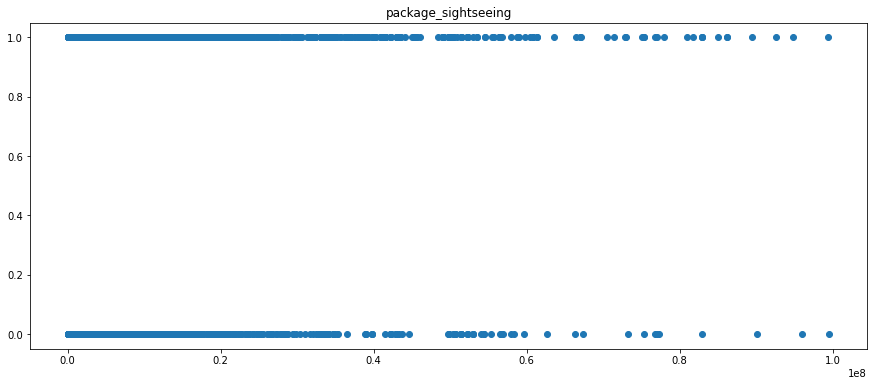

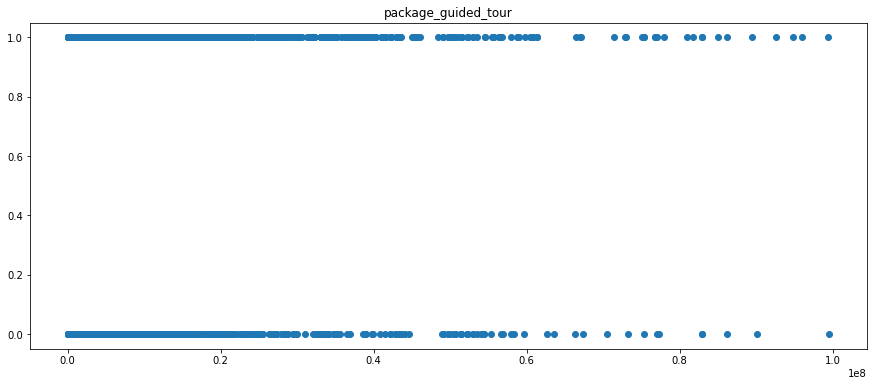

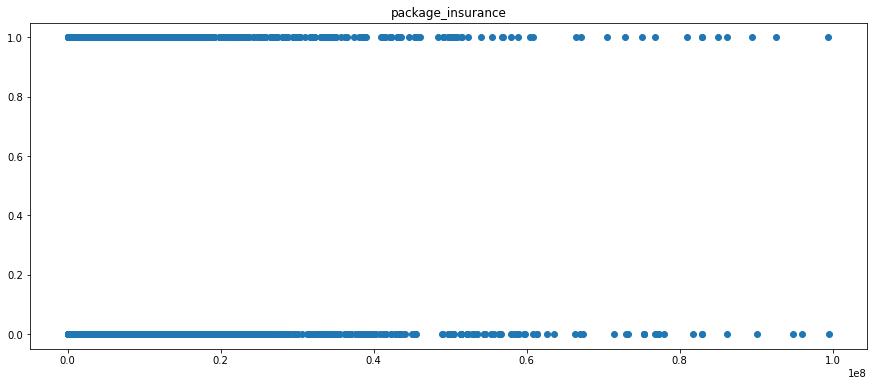

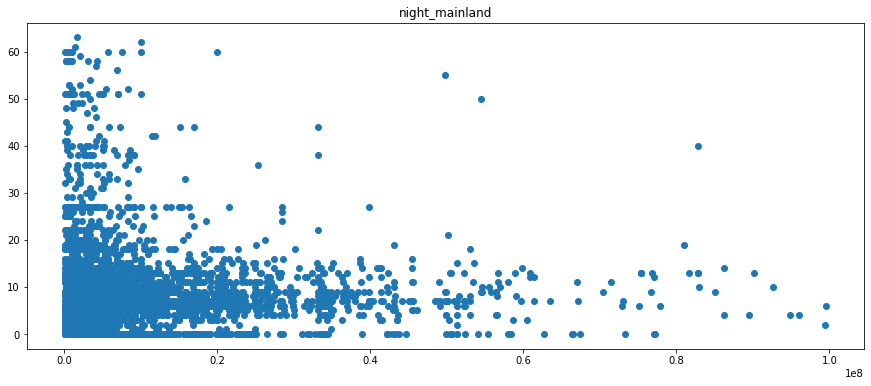

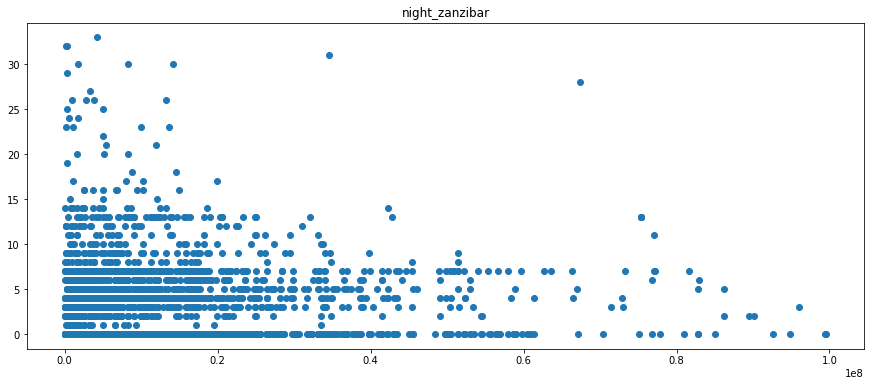

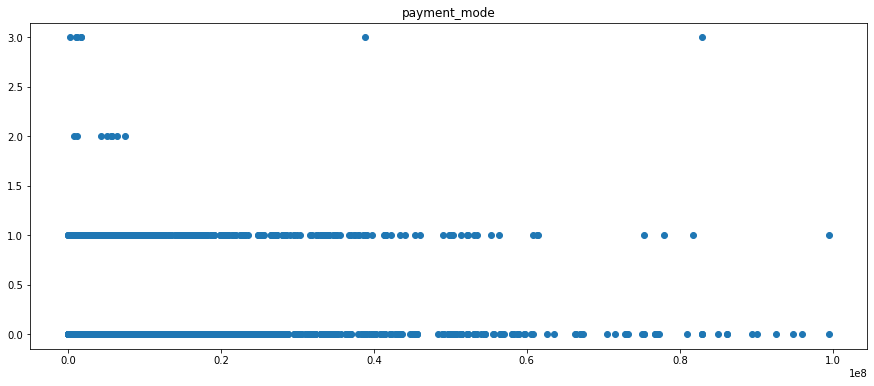

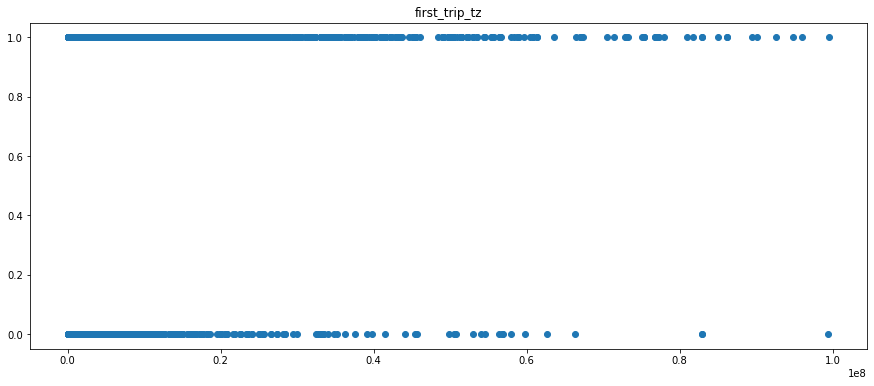

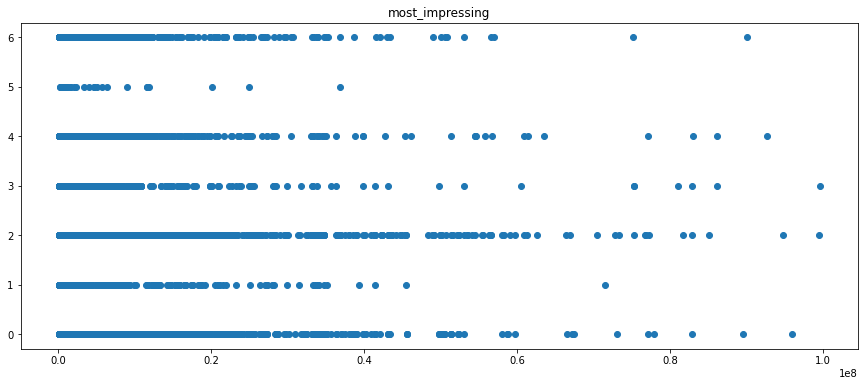

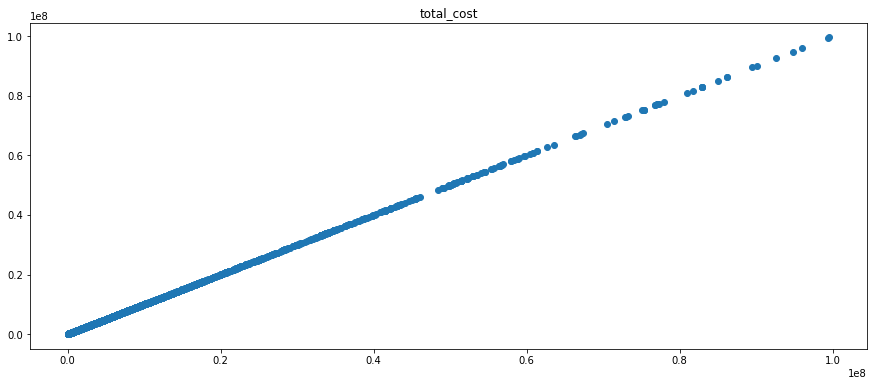

In [310]:
for col in train_df.select_dtypes('float64'):
  plt.figure(figsize=(15 , 6))
  plt.scatter(train_df['total_cost'] , train_df[col])
  plt.title(col)

In [311]:
train_df.drop(columns=['ID' , 'country'] , axis = 1 , inplace = True)

In [312]:
test_df.drop(columns=['ID' , 'country'] , axis = 1 , inplace = True)

In [313]:
train_df.head()

,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4,0.0,2.0,1.0,0.0,1.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0.0,1.0,4.0,1657500.0
20,0.0,2.0,1.0,0.0,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,1.0,6.0,711262.5
24,0.0,2.0,1.0,1.0,1.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,0.0,1.0,2.0,5673325.0
25,0.0,2.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,1.0,4.0,400000.0
27,0.0,2.0,1.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,4.0,0.0,1.0,3.0,453866.0


In [314]:
print('train_df: ',train_df.shape , '-'*20 , 'test_df:  ' , test_df.shape)

train_df:  (4809, 21) -------------------- test_df:   (1601, 20)


In [315]:
train_df['travel_with'].unique()

array([2., 0., 1., 3., 4.])

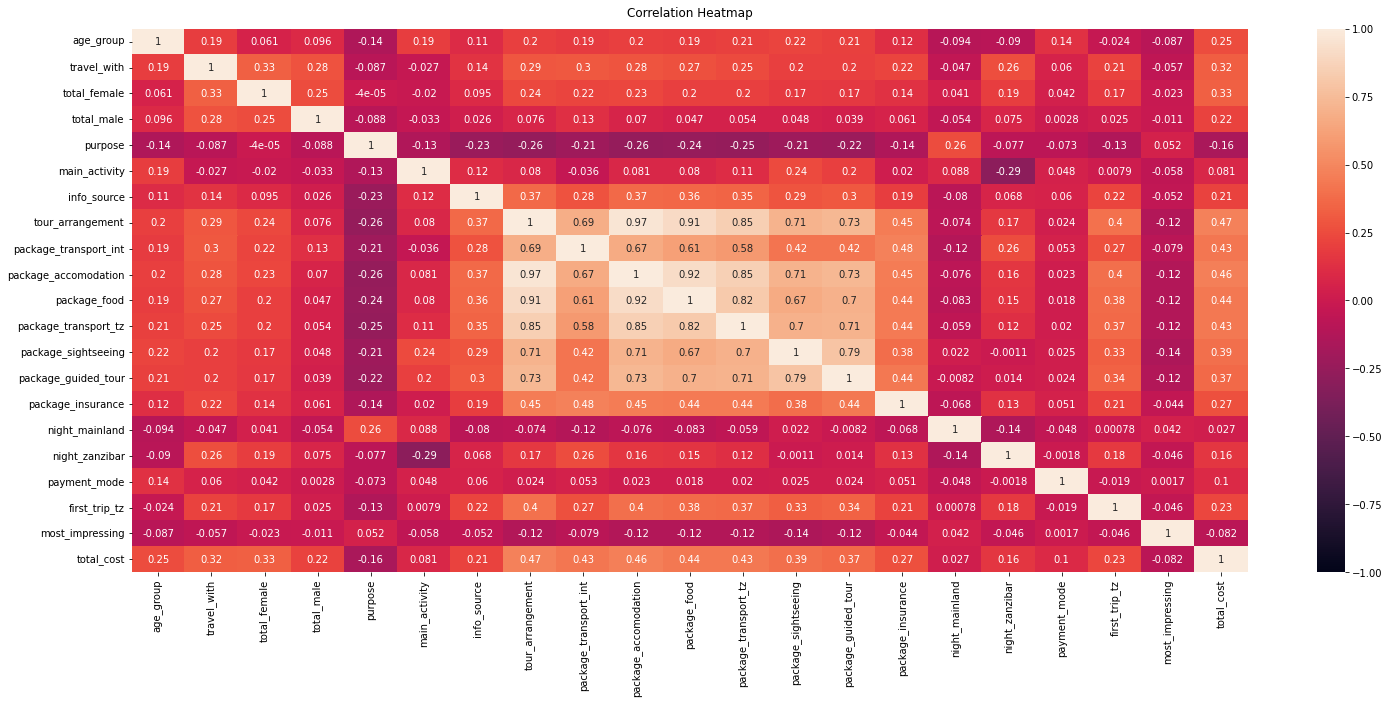

In [316]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

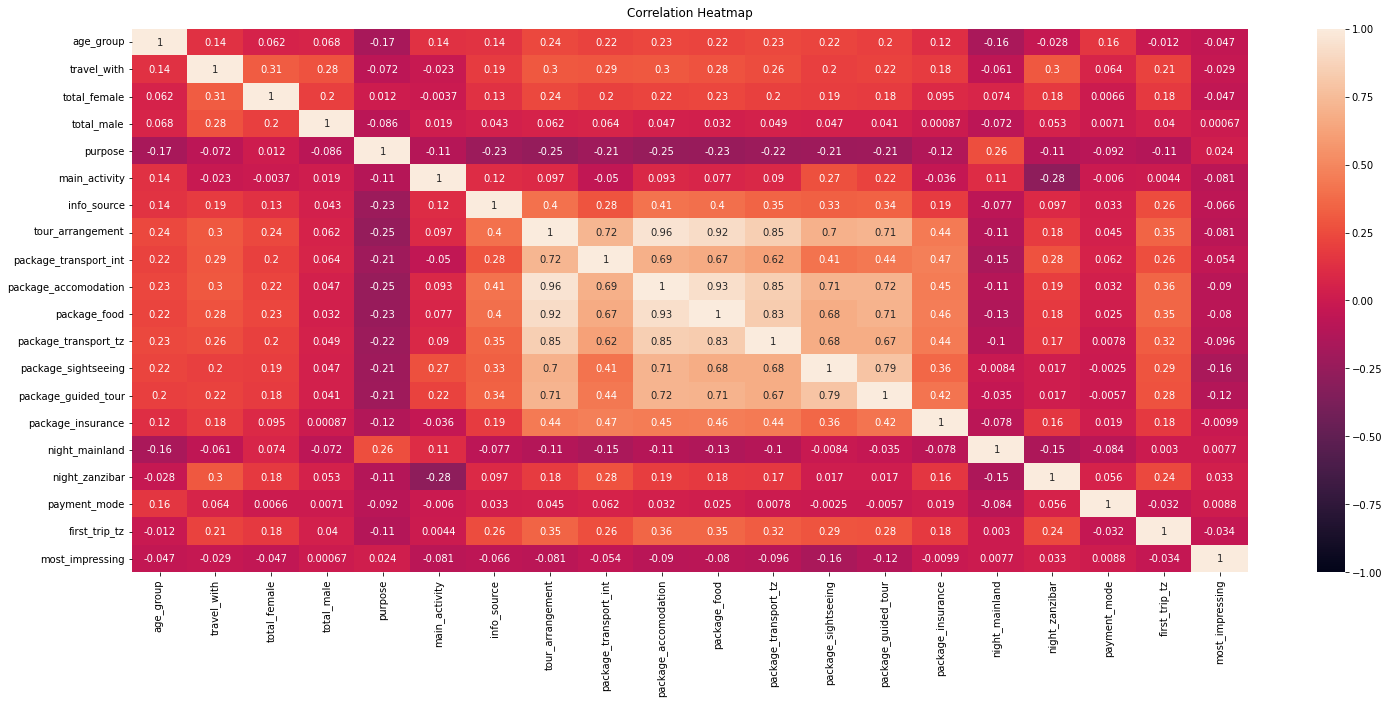

In [317]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(test_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


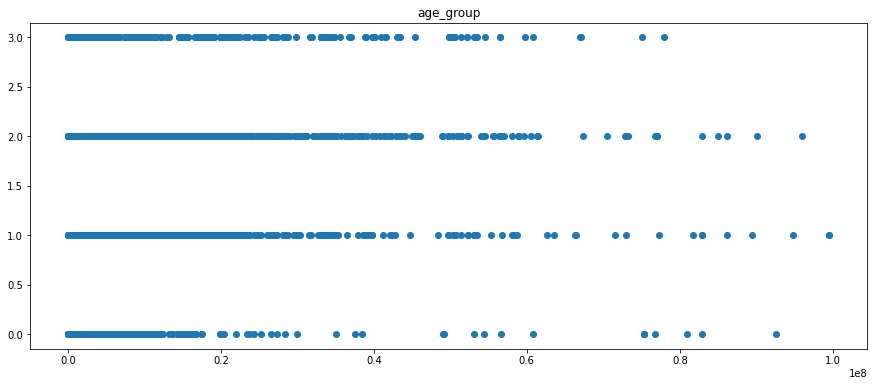

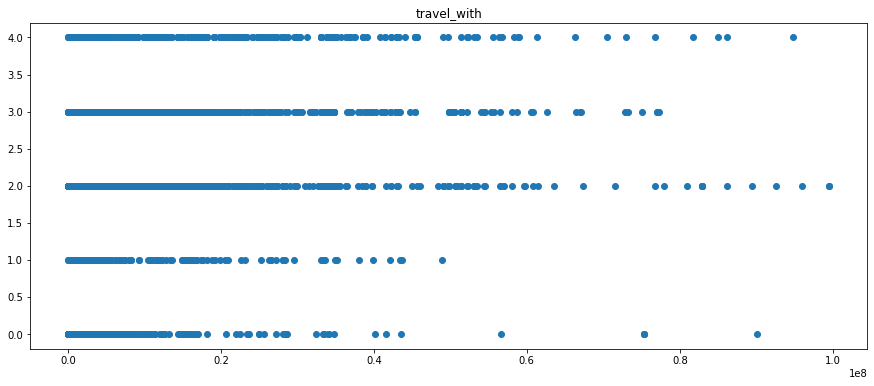

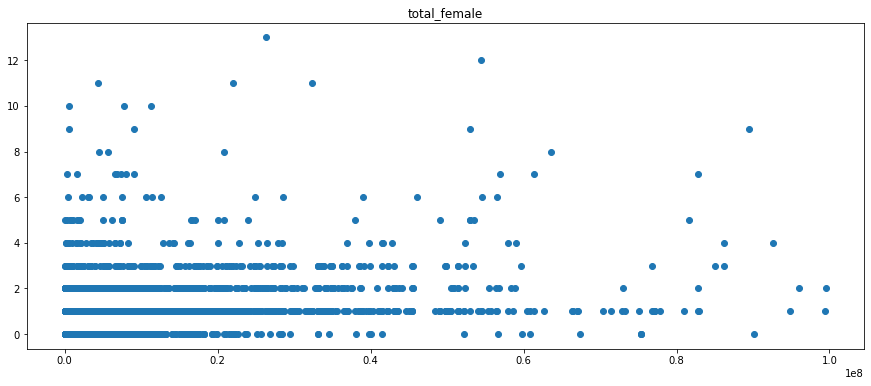

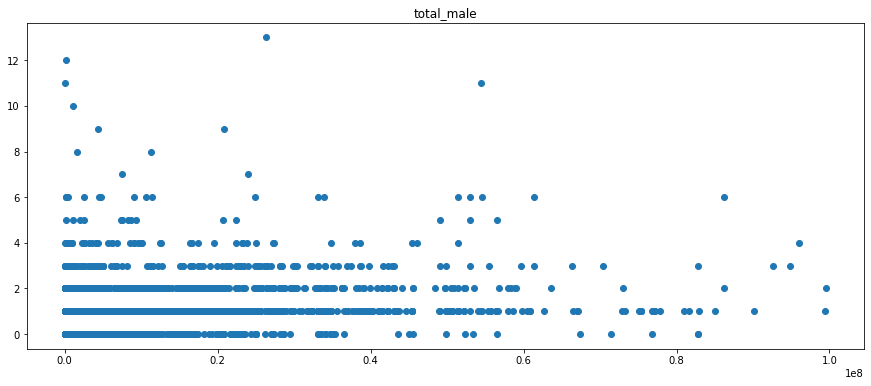

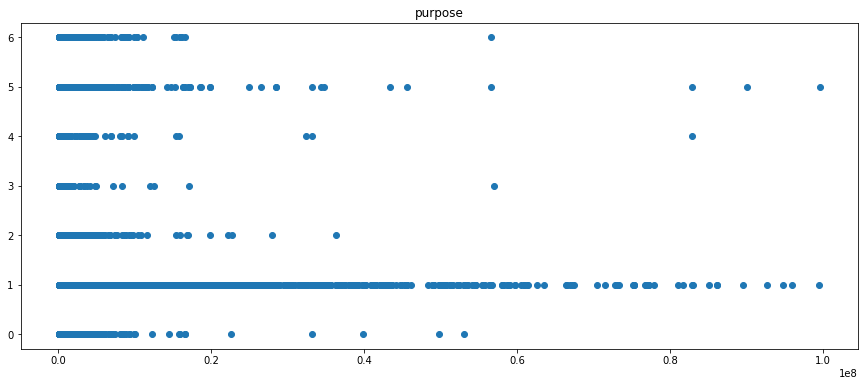

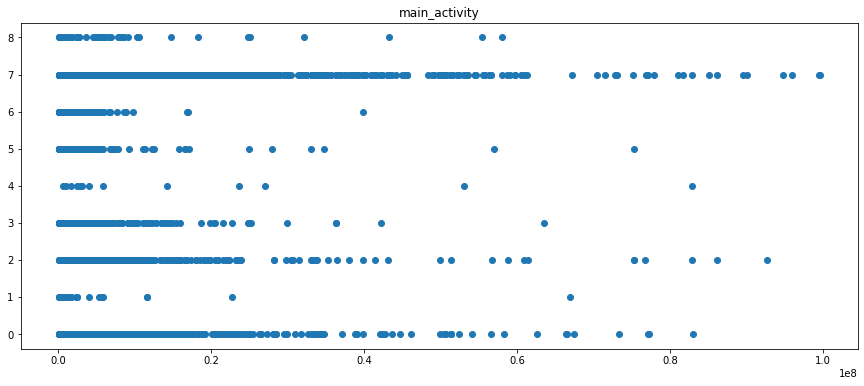

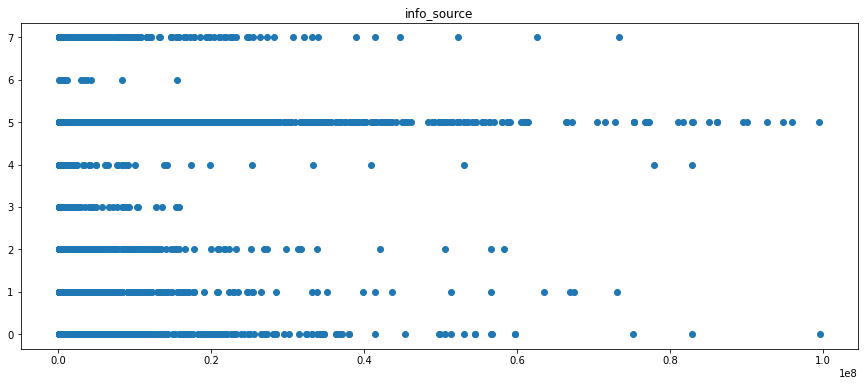

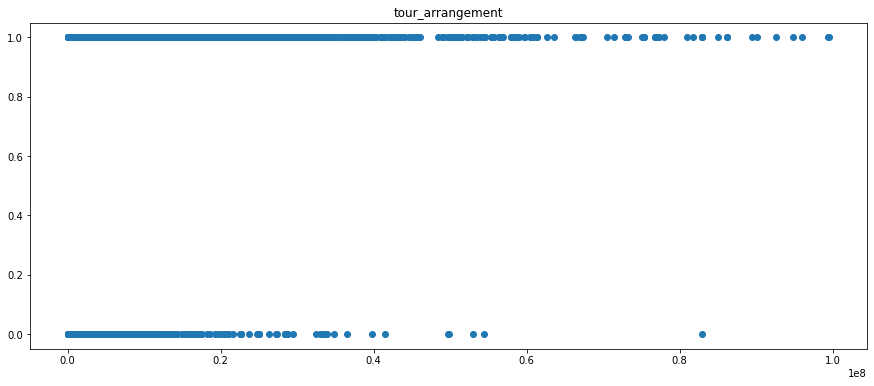

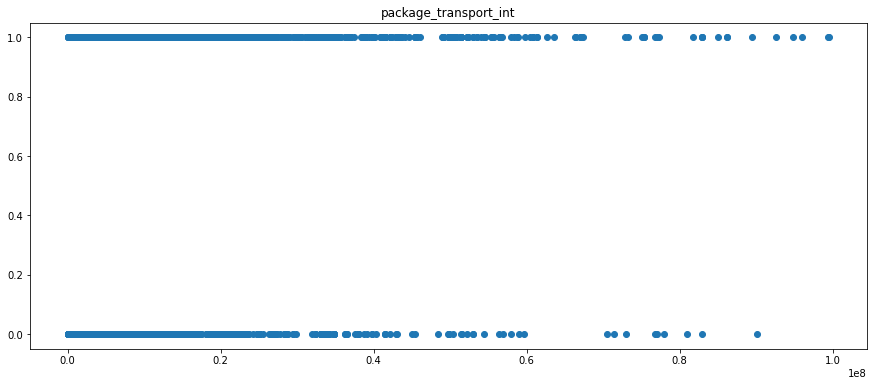

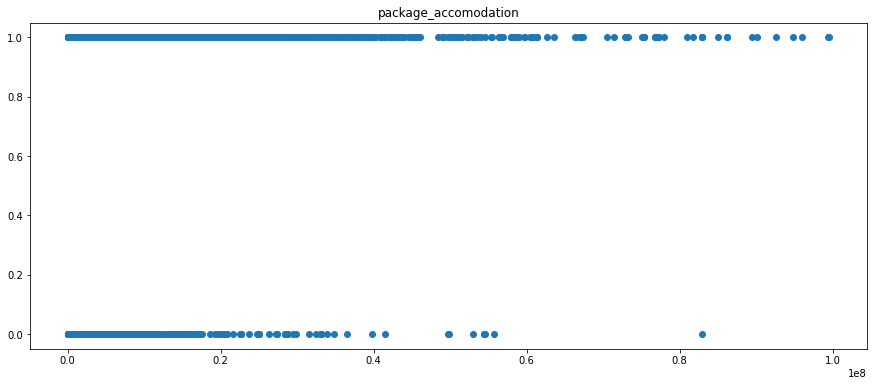

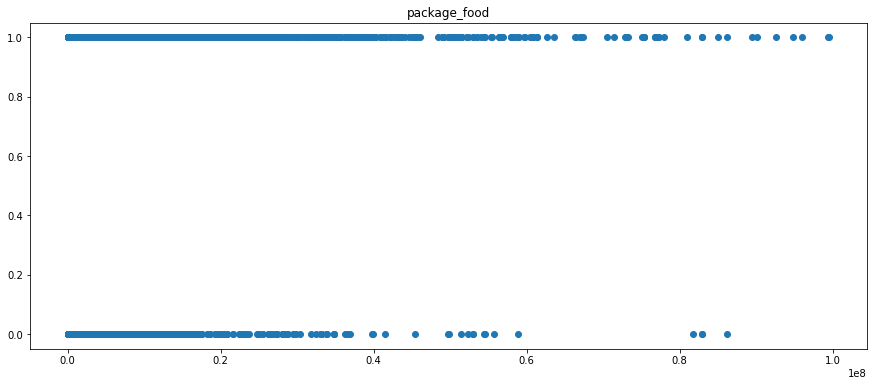

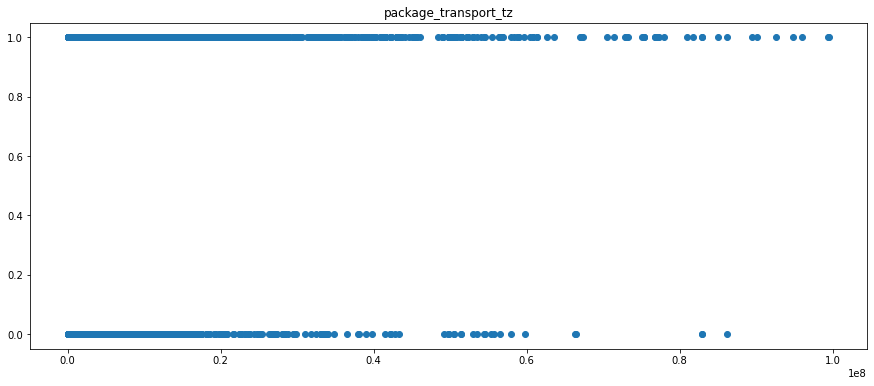

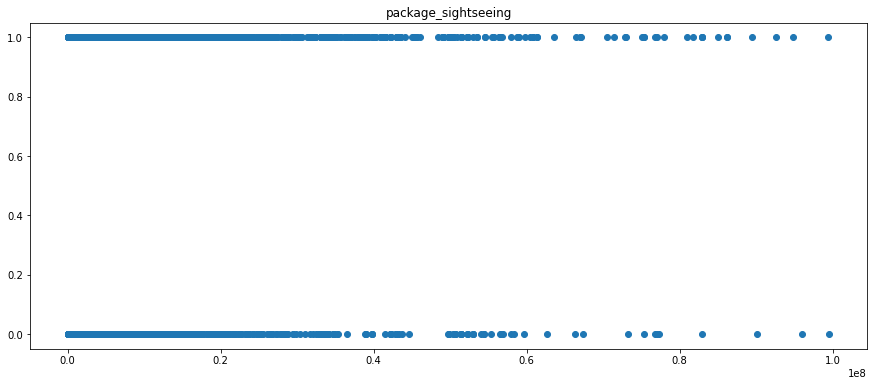

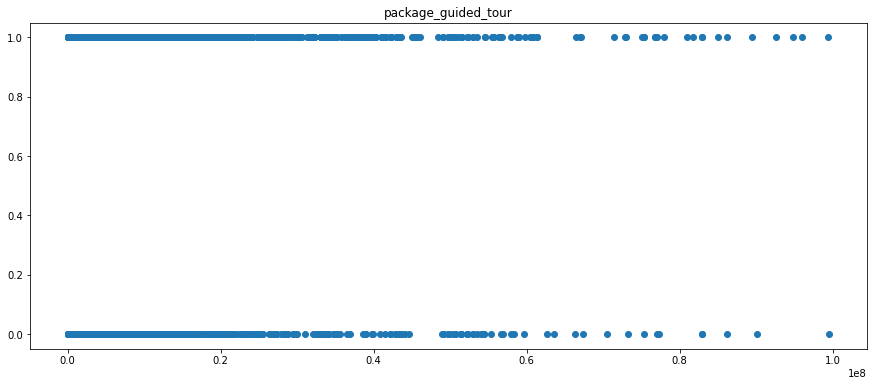

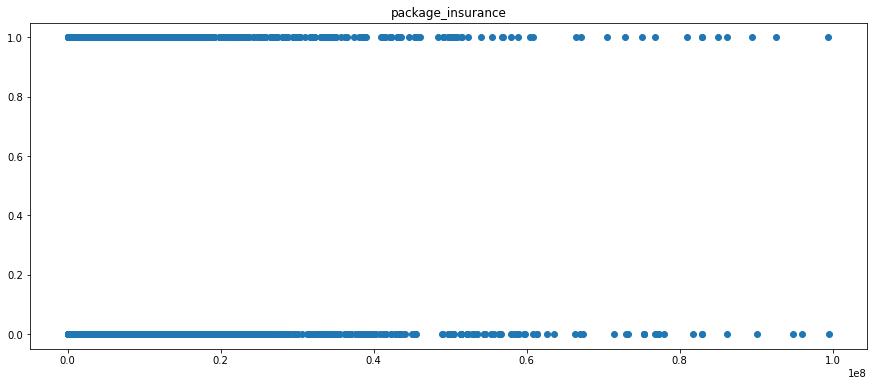

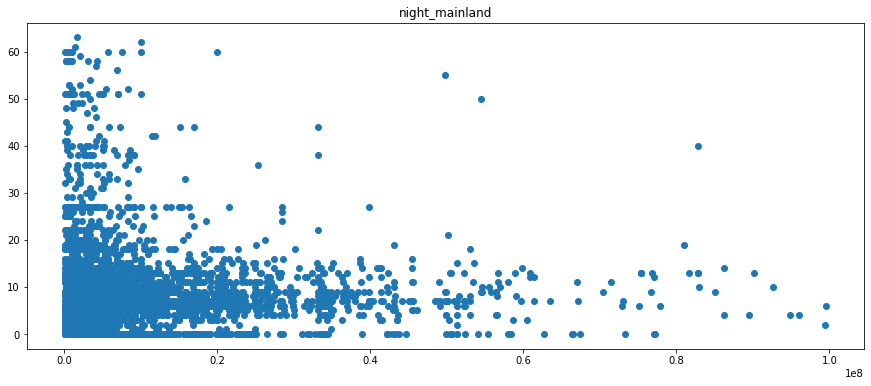

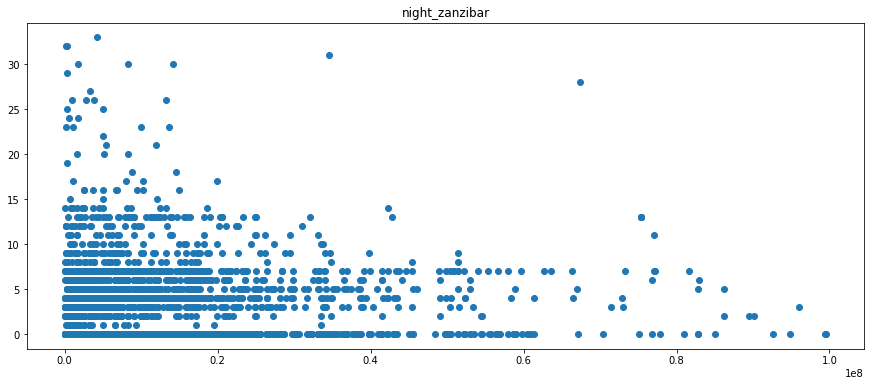

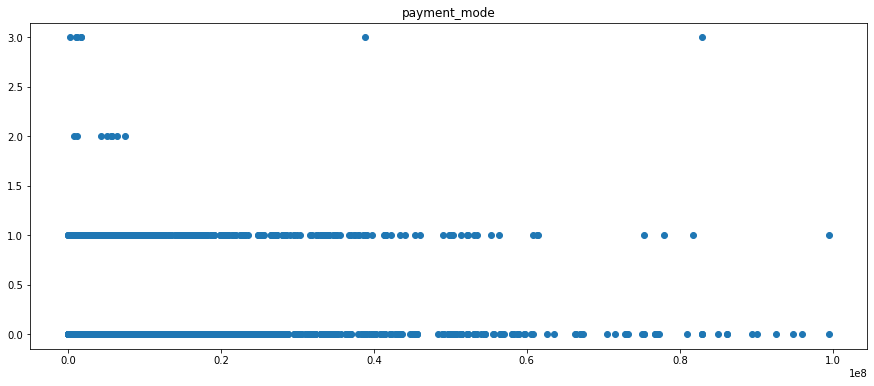

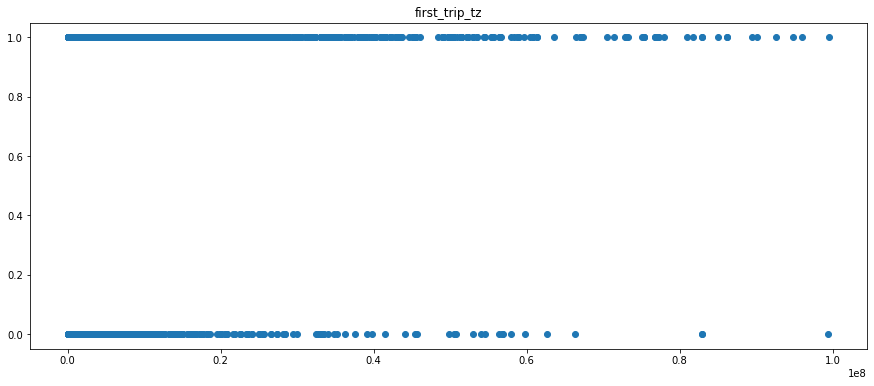

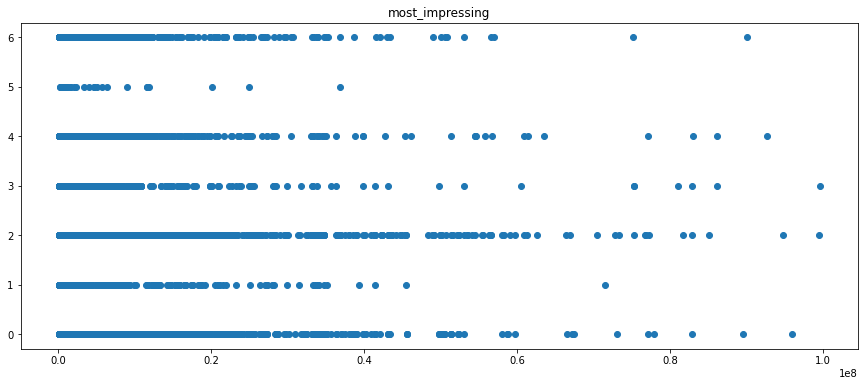

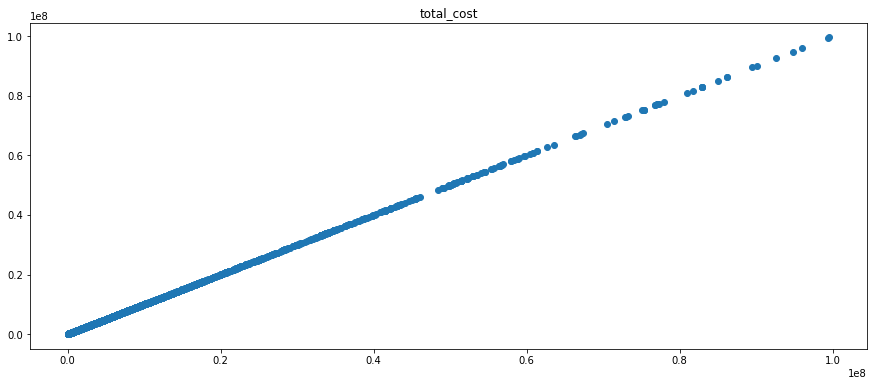

In [318]:
for col in train_df.select_dtypes('float64'):
  plt.figure(figsize=(15 , 6))
  plt.scatter(train_df['total_cost'] , train_df[col])
  plt.title(col)

In [319]:
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==6 ,0)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==5 ,0)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==4 ,0)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==3 ,0)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==1,0)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==0 ,1)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==2 ,1)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==8 ,1)
train_df['main_activity'] = train_df['main_activity'].mask(train_df['main_activity']==7 ,3)

In [320]:
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==6 ,0)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==5 ,0)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==4 ,0)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==3 ,0)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==1,0)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==0 ,1)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==2 ,1)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==8 ,1)
test_df['main_activity'] = test_df['main_activity'].mask(test_df['main_activity']==7 ,3)

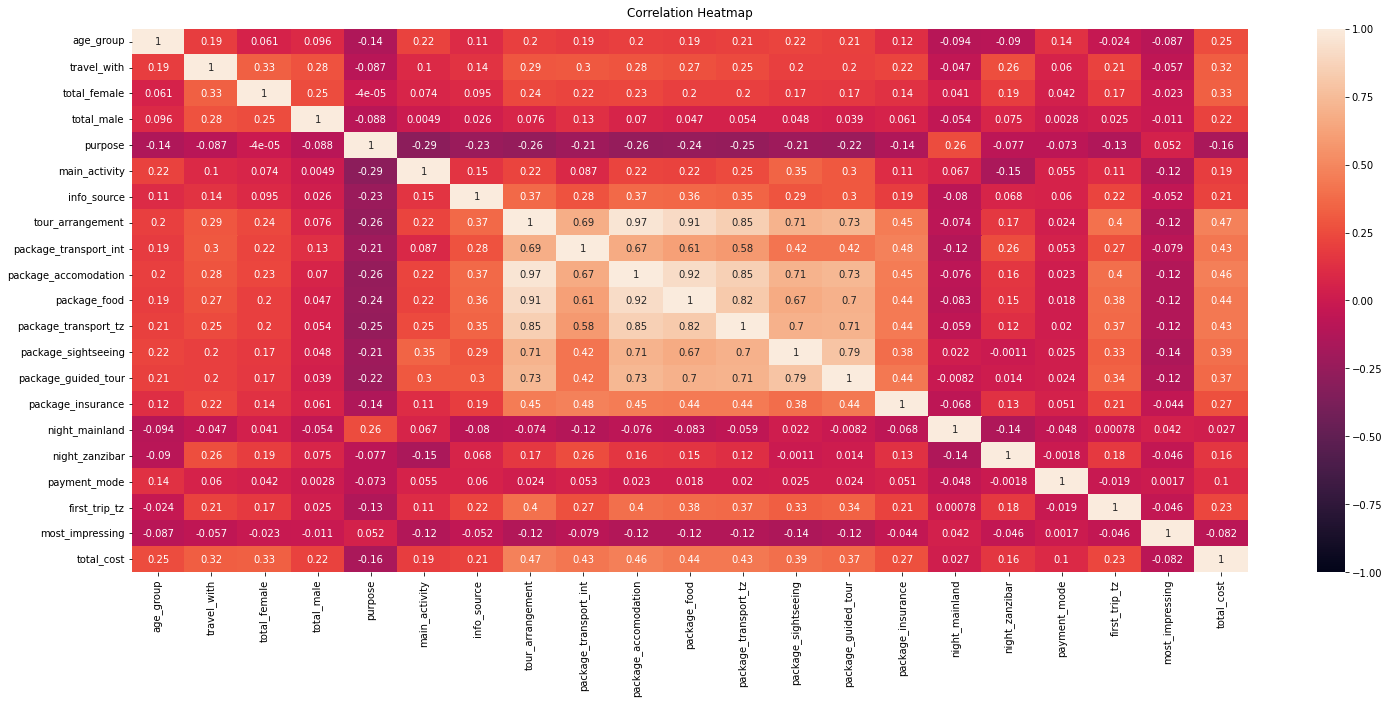

In [321]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

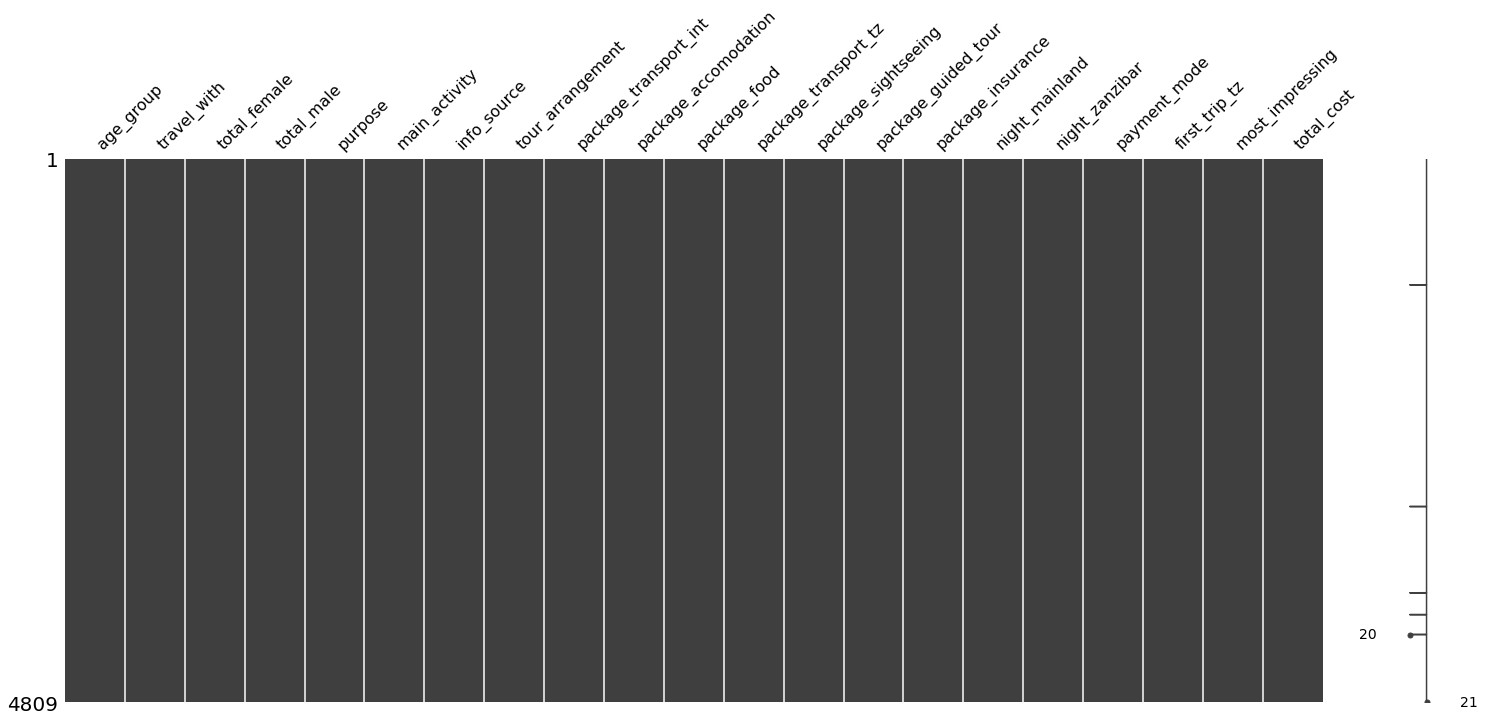

In [322]:
mis.matrix(train_df)

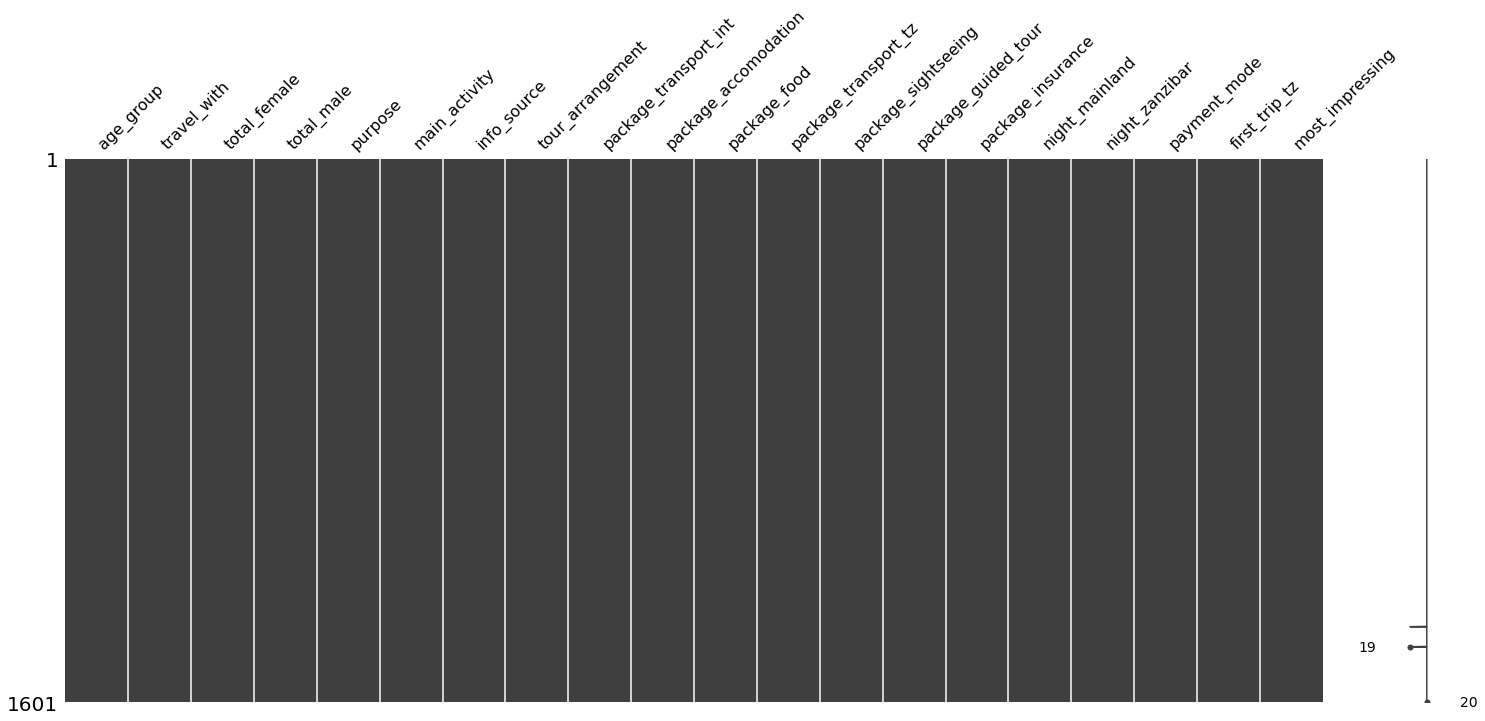

In [323]:
mis.matrix(test_df)

In [324]:
scaler = MinMaxScaler()
for  col in train_df:
  if(col != 'total_cost'):
    train_df[col] = scaler.fit_transform(train_df[[col]])

In [325]:
train_df

,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4,0.0,0.50,0.076923,0.000000,0.166667,1.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.121212,0.000000,1.0,0.666667,1657500.0
20,0.0,0.50,0.076923,0.000000,1.000000,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920635,0.000000,0.000000,1.0,1.000000,711262.5
24,0.0,0.50,0.076923,0.076923,0.166667,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.181818,0.000000,1.0,0.333333,5673325.0
25,0.0,0.50,0.153846,0.153846,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.212121,0.000000,1.0,0.666667,400000.0
27,0.0,0.50,0.076923,0.000000,0.166667,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349206,0.121212,0.000000,1.0,0.500000,453866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,1.0,0.75,0.076923,0.076923,0.166667,1.0,0.714286,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.158730,0.000000,0.000000,1.0,1.000000,33813000.0
4643,1.0,0.50,0.153846,0.153846,0.166667,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.206349,0.000000,0.000000,0.0,0.666667,18232500.0
4735,1.0,0.75,0.076923,0.076923,0.166667,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.111111,0.212121,0.333333,1.0,0.333333,10773750.0
4767,1.0,0.75,0.076923,0.076923,0.166667,1.0,0.714286,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.126984,0.090909,0.000000,1.0,1.000000,20387250.0


In [326]:
test_df

,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
3,0.0,2.0,2.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0
7,0.0,0.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,3.0,0.0,0.0,2.0
8,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0
9,0.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,8.0,0.0,1.0,2.0
13,0.0,2.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,3.0,0.0,1.0,0.0,1.0,3.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0
1334,3.0,3.0,1.0,1.0,1.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,0.0,1.0,1.0,6.0
1370,3.0,3.0,1.0,1.0,1.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0,0.0,0.0,1.0,0.0
1378,3.0,2.0,1.0,0.0,1.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,0.0,0.0,1.0,0.0


In [327]:
print("skewness:" , train_df['total_cost'].skew())
print("kurtosis:" , train_df['total_cost'].kurt())

skewness: 2.967848049855268
kurtosis: 11.431051199158198


In [328]:
train_df['total_cost'] = np.log1p(train_df['total_cost'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


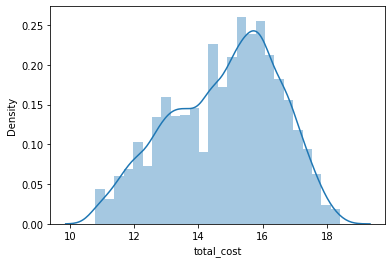

In [329]:
sns.distplot(train_df['total_cost'])

In [330]:
train_df

,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4,0.0,0.50,0.076923,0.000000,0.166667,1.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.121212,0.000000,1.0,0.666667,14.320822
20,0.0,0.50,0.076923,0.000000,1.000000,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920635,0.000000,0.000000,1.0,1.000000,13.474798
24,0.0,0.50,0.076923,0.076923,0.166667,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.181818,0.000000,1.0,0.333333,15.551286
25,0.0,0.50,0.153846,0.153846,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.212121,0.000000,1.0,0.666667,12.899222
27,0.0,0.50,0.076923,0.000000,0.166667,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349206,0.121212,0.000000,1.0,0.500000,13.025559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,1.0,0.75,0.076923,0.076923,0.166667,1.0,0.714286,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.158730,0.000000,0.000000,1.0,1.000000,17.336356
4643,1.0,0.50,0.153846,0.153846,0.166667,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.206349,0.000000,0.000000,0.0,0.666667,16.718716
4735,1.0,0.75,0.076923,0.076923,0.166667,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.111111,0.212121,0.333333,1.0,0.333333,16.192623
4767,1.0,0.75,0.076923,0.076923,0.166667,1.0,0.714286,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.126984,0.090909,0.000000,1.0,1.000000,16.830420


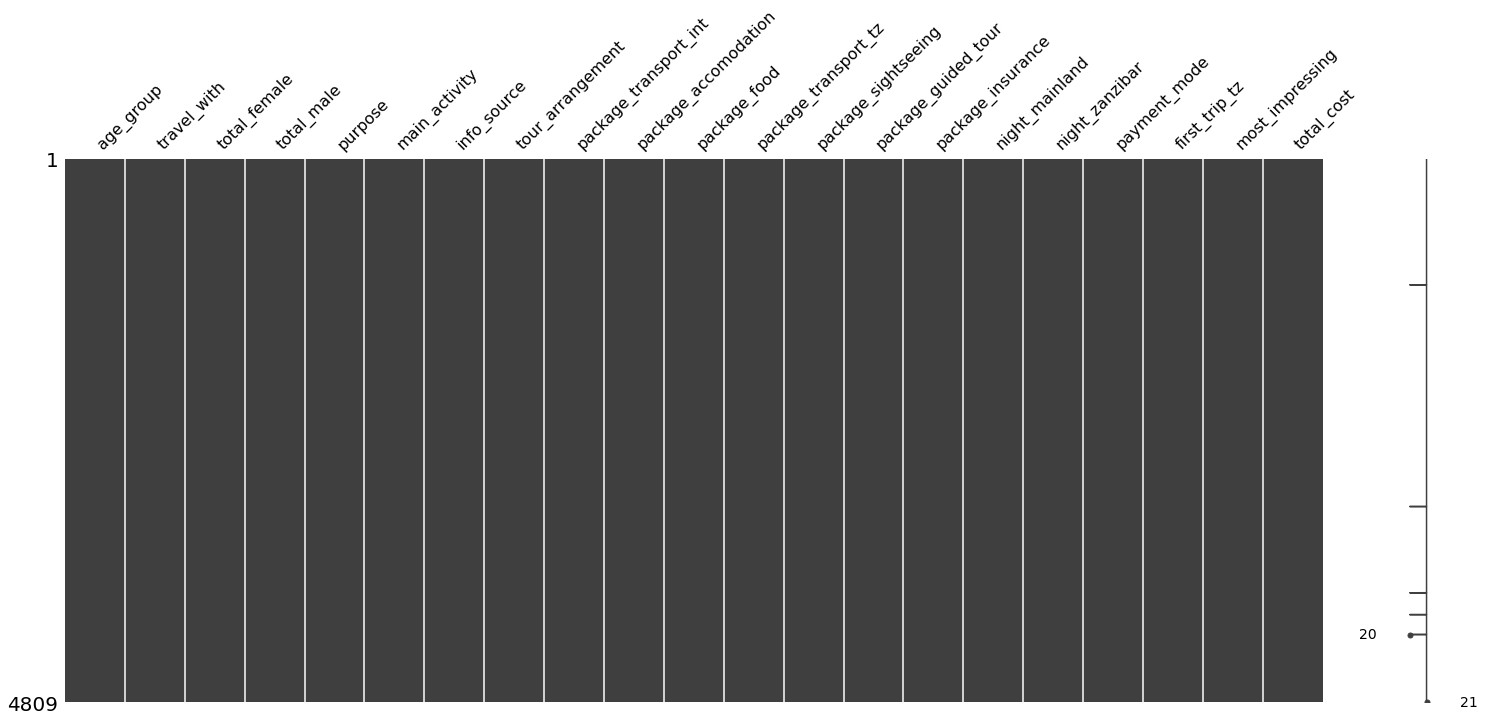

In [331]:
mis.matrix(train_df)

In [332]:
print(train_df.columns)

Index(['age_group', 'travel_with', 'total_female', 'total_male', 'purpose',
       'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_cost'],
      dtype='object')


In [333]:
train_df=train_df.drop(train_df.columns[np.isnan(train_df).any()], axis=1)

In [334]:
print(train_df.columns)

Index(['age_group', 'travel_with', 'total_female', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'night_mainland', 'night_zanzibar', 'payment_mode', 'first_trip_tz',
       'most_impressing', 'total_cost'],
      dtype='object')


In [335]:
x_train = train_df.drop(columns=['total_cost'] , axis = 1)
y_train = train_df['total_cost']

In [336]:
x_train

,age_group,travel_with,total_female,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
4,0.0,0.50,0.076923,0.166667,1.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.121212,0.000000,1.0,0.666667
20,0.0,0.50,0.076923,1.000000,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920635,0.000000,0.000000,1.0,1.000000
24,0.0,0.50,0.076923,0.166667,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.181818,0.000000,1.0,0.333333
25,0.0,0.50,0.153846,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.212121,0.000000,1.0,0.666667
27,0.0,0.50,0.076923,0.166667,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349206,0.121212,0.000000,1.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,1.0,0.75,0.076923,0.166667,1.0,0.714286,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.158730,0.000000,0.000000,1.0,1.000000
4643,1.0,0.50,0.153846,0.166667,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.206349,0.000000,0.000000,0.0,0.666667
4735,1.0,0.75,0.076923,0.166667,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.111111,0.212121,0.333333,1.0,0.333333
4767,1.0,0.75,0.076923,0.166667,1.0,0.714286,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.126984,0.090909,0.000000,1.0,1.000000


In [337]:
ln = LinearRegression()
model = ln.fit(x_train,y_train)

In [338]:
model.score(x_train , y_train)

0.49389151254520924

In [339]:
test_df=test_df.drop(test_df.columns[np.isnan(test_df).any()], axis=1)

In [340]:
y_pred = model.predict(test_df)
y_pred = np.expm1(y_pred)

In [341]:
sample = pd.read_csv('SampleSubmission.csv')

In [342]:
sample

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0
...,...,...
1596,tour_988,0
1597,tour_990,0
1598,tour_992,0
1599,tour_996,0


In [343]:
data = {'ID':id_test , 
        'total_cost':y_pred}

In [344]:
df = pd.DataFrame(data)

In [345]:
df = df.sort_values(ascending = True , by = "ID")

In [347]:
df.reset_index(drop=True, inplace=True)

In [348]:
df

,ID,total_cost
0,tour_1,5.699146e+20
1,tour_100,7.124439e+18
2,tour_1001,1.667648e+30
3,tour_1006,4.289133e+12
4,tour_1009,2.488041e+18
...,...,...
1596,tour_988,8.722428e+06
1597,tour_990,1.379659e+26
1598,tour_992,2.908228e+11
1599,tour_996,3.857916e+09


In [349]:
from google.colab import files
df.to_csv('df.csv') 
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>